# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Alif Nurhidayat
- **Email:** alifnurhidayatwork@gmail.com | mc189d5y0351@student.devacademy.id
- **ID Dicoding:** Alif Nurhidayat | MC189D5Y0351

## Menentukan Pertanyaan Bisnis

- Bagaimana tren perubahan konsentrasi PM2.5 dan PM10 di masing-masing stasiun selama periode pengamatan tertentu (misalnya Januari 2013 hingga Desember 2013)?
- Bagaimana hubungan antara faktor meteorologi (seperti suhu, tekanan, titik embun, dan kecepatan angin) dengan konsentrasi polutan (NO₂, SO₂, CO) di setiap stasiun?
- Apakah terdapat perbedaan signifikan dalam kualitas udara antar stasiun, dan faktor-faktor apa saja yang mempengaruhi perbedaan tersebut?
- Apakah terdapat pola musiman atau waktu tertentu (misalnya jam atau hari) di mana terjadi lonjakan atau penurunan konsentrasi polutan di setiap stasiun?
- Apakah terdapat perbedaan pola konsentrasi polutan antara hari kerja dan akhir pekan di masing-masing stasiun?

## Import Semua Packages/Library yang Digunakan

In [79]:
!pip install scipy matplotlib seaborn streamlit
import pandas as pd
import numpy as np
import glob
import os


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Data Wrangling

### Gathering Data

In [80]:
# Mendapatkan semua file CSV di folder data yang sesuai pola nama
csv_files = glob.glob(os.path.join('data', 'PRSA_DATA_*.csv'))

# Membaca setiap file CSV dan menyimpannya dalam sebuah list
df_list = [pd.read_csv(file) for file in csv_files]

# Menggabungkan semua dataframe menjadi satu,
# dengan index yang disesuaikan ulang (mulai dari 0 daripada mengconcat
# index berdasarkan masing-masing csv)
df_PSRA_Data_SemuaStasiun = pd.concat(df_list, ignore_index=True)
#Menampilkan 
df_PSRA_Data_SemuaStasiun.head()

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin

**Insight:**
- Penggabungan Data Multi-File:
> Data diambil dari banyak file CSV dengan pola nama yang konsisten (PRSA_DATA_*.csv) dan kemudian digabungkan menjadi satu DataFrame. Hal ini menunjukkan dataset mencakup berbagai periode waktu atau lokasi (stasiun) yang mungkin telah diukur secara terpisah.
- Struktur Data dan Komponen Waktu:
> Setiap baris mewakili pengukuran pada satu jam tertentu. Kolom-kolom seperti year, month, day, dan hour dapat digabungkan untuk membuat objek datetime, yang sangat berguna untuk analisis tren waktu atau musiman.
- Parameter Kualitas Udara dan Meteorologi:
> 1. Data ini berisi pengukuran berbagai polutan seperti PM2.5, PM10, SO2, NO2, CO, dan O3.
Selain itu, terdapat parameter meteorologi seperti TEMP (suhu), PRES (tekanan), DEWP (titik embun), RAIN (curah hujan), wd (arah angin), dan WSPM (kecepatan angin).
> 2. Contoh pada sampel baris menunjukkan nilai PM2.5 yang rendah (misalnya 4.0 pada jam 0) dan nilai CO yang relatif tinggi (300.0), yang perlu diperiksa lebih lanjut apakah nilai tersebut merupakan ukuran aktual atau placeholder/unit yang berbeda.
- Variasi dan Konsistensi Data:
> 1. Pada baris-baris awal (misalnya, untuk tanggal 1 Maret 2013 di stasiun Aotizhongxin), terdapat variasi pada parameter kualitas udara (PM2.5, PM10, SO2, NO2) dan parameter meteorologi (suhu, tekanan, titik embun).
> 2. Konsistensi nilai seperti CO yang tetap (300.0) mungkin menunjukkan adanya nilai tetap atau nilai referensi yang harus dikaji lebih lanjut, terutama jika dibandingkan dengan parameter polutan lainnya.
- Potensi Analisis Lanjutan:
> 1. Dengan data yang sudah terstruktur rapi, Dapat melakukan analisis tren (misalnya, perbandingan polutan dari waktu ke waktu), analisis korelasi antara kualitas udara dengan parameter meteorologi, dan perbandingan antar stasiun.
> 2. Transformasi data (misalnya, penggabungan kolom tanggal dan jam menjadi datetime) akan mempermudah penerapan teknik analisis deret waktu.


### Assessing Data

In [81]:
# Menampilkan 5 baris pertama untuk verifikasi
print(df_PSRA_Data_SemuaStasiun.head())

# 1. Tampilkan Informasi dan Statistik Deskriptif Data
print("\n=== Data Info ===")
print("Total baris dataset: ", df_PSRA_Data_SemuaStasiun.count())
print(df_PSRA_Data_SemuaStasiun.info(), "\n")

# 2. Menampilkan ringkasan parameter statistik
print("\n=== Parameter Statistik ===")
print(df_PSRA_Data_SemuaStasiun.describe(), "\n")

# 3. Tampilkan data yang hilang
print("\n=== Data hilang per Kolom ===")
print(df_PSRA_Data_SemuaStasiun.isnull().sum(), "\n")

# 4. Tampilkan Informasi data yang duplikat
print("\n=== Data Duplikat per Kolom ===")
print("Jumlah duplikasi: ", df_PSRA_Data_SemuaStasiun.duplicated().sum(), "\n")

   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin  

=== Data Info ===
Total baris dataset:  No         420768
year       420768
month      420768
day        420768
hour       420768
PM2.5      412029
PM10       414319
SO2        411747
NO2        408652
CO         400067
O3         407491
TEMP

**Insight:**

---

### 1. Overview Data

- **Jumlah Baris:** Dataset memiliki total 420768 baris.
- **Jumlah Kolom:** Terdapat 18 kolom, yang mencakup informasi waktu (year, month, day, hour), parameter kualitas udara (PM2.5, PM10, SO2, NO2, CO, O3), serta variabel meteorologi (TEMP, PRES, DEWP, RAIN, wd, WSPM) dan identitas stasiun.

---

### 2. Ketersediaan Data (Missing Values)

Dari hasil pengecekan nilai yang hilang, terlihat bahwa:
- **Kolom Waktu dan Identitas:** Kolom seperti No, year, month, day, hour, dan station lengkap (tidak ada missing value).
- **Parameter Kualitas Udara dan Meteorologi:**
  - **PM2.5, PM10, SO2, NO2, CO, dan O3:** Memiliki missing value yang cukup signifikan (misalnya, PM2.5 hanya tersedia pada 412029 baris, sedangkan total baris adalah 420768). Ini perlu penanganan khusus, misalnya melalui metode imputasi (mean/median) atau penghapusan baris tergantung pada analisis lanjutan.
  - **TEMP, PRES, DEWP, RAIN, WSPM:** Missing value relatif kecil dibandingkan total data, sehingga strategi imputasi pun bisa diterapkan dengan lebih mudah.
  - **Kolom wd (arah angin):** Terdapat 1822 nilai yang hilang. Karena ini merupakan data kategorikal, penanganan missing value mungkin dilakukan dengan imputasi modus atau penandaan khusus.

Mengingat bahwa dataset ini merupakan data timeseries yang dilakukan secara rutin setiap jam, maka dapat diasumsikan bahwa tidak akan terjadi perubahan yang signifikan antara data satu dengan data sebelum dan data sesudahnya.

---

### 3. Statistik Deskriptif dan Deteksi Outlier

Dari parameter statistik didapatkan beberapa poin penting:

- **Distribusi Nilai dan Outlier:**
  - **PM2.5 & PM10:**  
    - Nilai maksimum keduanya adalah 999, sedangkan Q3 berada sekitar 111 (PM2.5) dan 145 (PM10).  
    - Kesenjangan ini mengindikasikan kemungkinan adanya outlier ekstrim.  
    - Kemungkinan nilai 999 bisa jadi merupakan placeholder untuk sensor error atau data yang tidak valid.
    
  - **CO:**  
    - Nilai maksimum mencapai 10.000 sedangkan median (50% persentil) adalah 900.  
    - Perbedaan yang sangat besar menunjukkan adanya nilai ekstrim atau kesalahan pengukuran.  
    - Diperlukan validasi tambahan apakah nilai tinggi ini benar-benar valid atau merupakan anomali.
    
- **Penyebaran Data:**
  - **Parameter lain (SO2, NO2, O3):**  
    - Meskipun memiliki missing value, distribusi nilai mereka cukup konsisten dengan rentang yang diharapkan, namun nilai maksimum yang tinggi (misalnya NO2 mencapai 290) perlu dikaji untuk memastikan apakah ini merupakan kejadian valid atau pengukuran error.
    
- **Variabel Meteorologi (TEMP, PRES, DEWP, RAIN, WSPM):**
  - Rentang dan sebaran nilainya menunjukkan variasi yang masuk akal, misalnya suhu (TEMP) berkisar dari -19.9 hingga 41.6, sedangkan PRES dan DEWP juga menunjukkan rentang yang wajar.
  
Perlu dilakukan transformasi untuk mengatasi outlier ini.

---

### 4. Konsistensi dan Duplikasi Data

- **Duplikasi:**  
  - Tidak ada duplikasi baris (jumlah duplikasi = 0). Ini menunjukkan bahwa proses pengumpulan data berjalan dengan baik dari sisi unique identifier.

---

### 5. Rangkuman Insight dan Langkah Selanjutnya

1. **Pembersihan Data:**  
   - **Handling Missing Values:**  
     - Identifikasi pola missing value pada kolom-kolom utama (PM2.5, PM10, SO2, NO2, CO, O3).  
     - Tentukan apakah akan melakukan imputasi dengan nilai rata-rata, median, atau menggunakan model prediktif untuk mengisi missing value.
   - **Outlier Detection:**  
     - Lakukan analisis outlier dengan visualisasi seperti boxplot untuk melihat distribusi nilai.  
     - Verifikasi apakah nilai 999 pada PM2.5 dan PM10 merupakan outlier atau placeholder error.
   - **Validasi Nilai Ekstrim:**  
     - Cek kembali nilai CO dan NO2 yang menunjukkan selisih besar antara median dan maksimum untuk memastikan keabsahan data.

2. **Analisis Lebih Lanjut:**  
   - **Exploratory Data Analysis (EDA):**  
     - Buat visualisasi untuk melihat tren data berdasarkan waktu (year, month, day, hour) dan hubungannya dengan parameter kualitas udara serta kondisi meteorologi.
   - **Feature Engineering:**  
     - Pertimbangkan untuk membuat variabel baru yang dapat memberikan insight tambahan, seperti indeks kualitas udara atau pengelompokan berdasarkan kondisi cuaca.
     
3. **Pemodelan:**  
   - Setelah data dibersihkan, langkah selanjutnya bisa berupa pemodelan untuk prediksi kualitas udara, analisis korelasi antara parameter meteorologi dan kualitas udara, atau segmentasi data berdasarkan stasiun.

---

Dengan insight lengkap ini, langkah-langkah berikutnya meliputi pembersihan data (handling missing values dan outlier) serta eksplorasi visual untuk mendalami pola data. Langkah-langkah tersebut akan memberikan landasan yang kuat untuk analisis dan pemodelan lanjutan guna mendapatkan pemahaman yang lebih mendalam tentang kualitas udara dan faktor-faktor pendukungnya.

### Cleaning Data

In [82]:
#Fungsi helper untuk menyingkat kode
def calculate_outliers(data):
    """
    Menghitung nilai outlier dalam data menggunakan metode IQR.
    Mengembalikan list nilai yang dianggap outlier.
    """
    q25, q75 = np.percentile(data.dropna(), 25), np.percentile(data.dropna(), 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    minimum, maximum = q25 - cut_off, q75 + cut_off
    return [x for x in data if x < minimum or x > maximum]

def check_outliers(all_data):
    print("\n=== Outliers per Kolom ===")
    for col in all_data.columns:
        # Cek apakah kolom bertipe numerik
        if pd.api.types.is_numeric_dtype(all_data[col]):
            outliers = calculate_outliers(all_data[col])
            print(f"Kolom '{col}' memiliki {len(outliers)} outlier")
        else:
            print(f"Kolom '{col}' tidak numerik, dilewati.")

def clean_missing_with_median_and_mode(df):
    """
    Mendeteksi kolom yang memiliki missing value dan mengisinya dengan nilai representatif.
    
    Untuk kolom numerik, missing value diisi dengan median.
    Untuk kolom non-numerik, missing value diisi dengan mode.
    
    Parameters:
      - df: DataFrame yang akan dibersihkan.
    
    Returns:
      - DataFrame yang telah dibersihkan.
    """
    # Iterasi melalui setiap kolom pada DataFrame
    for col in df.columns:
        missing_count = df[col].isnull().sum()
        if missing_count > 0:
            # Jika kolom bertipe numerik, gunakan median
            if pd.api.types.is_numeric_dtype(df[col]):
                median_val = df[col].median()
                df[col] = df[col].fillna(median_val)
                print(f"Kolom '{col}' memiliki {missing_count} missing value. Diisi dengan median: {median_val}.")
            # Jika kolom non-numerik, gunakan mode
            else:
                mode_val = df[col].mode()[0]
                df[col] = df[col].fillna(mode_val)
                print(f"Kolom '{col}' non-numerik memiliki {missing_count} missing value. Diisi dengan mode: {mode_val}.")
    return df

def fill_missing_with_previous(df, columns=None):
    """
    Mengisi nilai missing pada kolom-kolom tertentu dengan menggunakan nilai sebelumnya (forward fill).
    Jika masih terdapat missing value (misalnya pada baris awal), digunakan backward fill sebagai cadangan.
    
    Parameters:
      - df: DataFrame yang akan diproses.
      - columns: (Optional) List nama kolom yang ingin diisi. Jika tidak disediakan, 
                 fungsi akan mengisi semua kolom yang memiliki missing value.
                 
    Returns:
      - DataFrame yang telah diisi missing value.
    """
    if columns is None:
        # Ambil semua kolom yang memiliki missing value
        columns = df.columns[df.isnull().any()].tolist()
    
    for col in columns:
        missing_before = df[col].isnull().sum()
        # Isi missing value dengan nilai sebelumnya (forward fill)
        df[col] = df[col].ffill()
        # Jika masih ada missing (misalnya pada baris pertama), lakukan backward fill
        df[col] = df[col].bfill()
        missing_after = df[col].isnull().sum()
        print(f"Kolom '{col}': missing count sebelum = {missing_before}, setelah = {missing_after}")
    
    return df

def auto_winsorize(df, lower_quantile=0.05, upper_quantile=0.95):
    """
    Mendeteksi kolom numerik yang memiliki outlier dan menerapkan winsorizing pada kolom tersebut.
    
    Parameter:
    - df: DataFrame yang akan diproses.
    - lower_quantile: Batas bawah quantile (default 0.05).
    - upper_quantile: Batas atas quantile (default 0.95).
    
    Fungsi ini akan memeriksa setiap kolom numerik:
      - Jika kolom memiliki outlier (berdasarkan metode IQR), winsorize dilakukan dengan 
        mengganti nilai di luar batas dengan nilai pada quantile yang ditentukan.
      - Jika tidak ada outlier, kolom tetap tidak berubah.
    
    Mengembalikan DataFrame yang telah diproses.
    """
    for col in df.select_dtypes(include=[np.number]).columns:
        outliers = calculate_outliers(df[col])
        if len(outliers) > 0:
            lower = df[col].quantile(lower_quantile)
            upper = df[col].quantile(upper_quantile)
            df[col] = df[col].clip(lower, upper)
            print(f"Kolom '{col}' memiliki {len(outliers)} outlier, winsorized dengan batas bawah {lower} dan atas {upper}.")
        else:
            print(f"Kolom '{col}' tidak memiliki outlier.")
    return df

def auto_transform_negative_outliers(df):
    """
    Mendeteksi kolom numerik yang memiliki outlier dan menerapkan transformasi log.
    Jika terdapat nilai negatif atau nol, data akan digeser agar semua nilai > 0
    sebelum diterapkan log1p.
    
    Parameter:
    - df: DataFrame yang akan diproses.
    
    Fungsi ini akan:
      - Iterasi melalui setiap kolom numerik.
      - Menghitung jumlah outlier dengan metode IQR.
      - Jika terdapat outlier, periksa apakah terdapat nilai <= 0.
         - Jika ada, hitung shift = abs(minimum) + 1 dan terapkan transformasi log pada (data + shift).
         - Jika tidak ada, langsung terapkan np.log1p.
      - Kolom yang tidak memiliki outlier akan diberitahu dan tidak diubah.
      
    Mengembalikan DataFrame yang telah diperbarui.
    """
    for col in df.select_dtypes(include=[np.number]).columns:
        outliers = calculate_outliers(df[col])
        num_outliers = len(outliers)
        if num_outliers > 0:
            if (df[col] <= 0).any():
                shift = abs(df[col].min()) + 1
                df[col] = np.log1p(df[col] + shift)
                print(f"Kolom '{col}' memiliki {num_outliers} outlier dan nilai negatif/nol, diterapkan shift sebesar {shift} dan transformasi log.")
            else:
                df[col] = np.log1p(df[col])
                print(f"Kolom '{col}' memiliki {num_outliers} outlier, transformasi log1p diterapkan.")
        else:
            print(f"Kolom '{col}' tidak memiliki outlier")
    return df

def show_negative_rows(df, columns=None):
    """
    Menampilkan baris pada DataFrame yang mengandung nilai negatif pada kolom numerik.
    
    Parameters:
    - df: DataFrame yang akan diperiksa.
    - columns: (Optional) List nama kolom yang ingin dicek. Jika tidak disediakan, 
      fungsi akan mengecek semua kolom numerik.
      
    Returns:
    - DataFrame yang berisi baris-baris dengan nilai negatif.
    """
    # Jika kolom tidak disediakan, pilih semua kolom numerik
    if columns is None:
        columns = df.select_dtypes(include=[np.number]).columns
    
    # Filter baris yang memiliki nilai negatif pada setidaknya satu kolom
    negative_rows = df[(df[columns] < 0).any(axis=1)]
    
    print("Baris-baris dengan nilai negatif:")
    print(negative_rows)
    return negative_rows


In [83]:
# Salin DataFrame asli untuk referensi distribusi sebelum transformasi
df_Original_PSRA_Data_SemuaStasiun = df_PSRA_Data_SemuaStasiun.copy()
print("Contoh data asli:")
print(df_Original_PSRA_Data_SemuaStasiun.head())

# Tampilkan jumlah missing value per kolom untuk memastikan kondisi awal data
print("\n=== Jumlah Missing Value per Kolom (Sebelum Pembersihan) ===")
print(df_PSRA_Data_SemuaStasiun.isnull().sum(), "\n")

# Langkah 1: Imputasi Missing Value dengan Menggunakan Nilai Sebelumnya
# Diasumsikan bahwa variabel tidak berubah secara mendadak, sehingga missing value
# diisi dengan nilai dari baris sebelumnya (forward fill) dan jika perlu, backward fill.
cols_to_impute = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'DEWP', 'RAIN', 'wd', 'WSPM', 'PRES']
df_PSRA_Data_SemuaStasiun = fill_missing_with_previous(df_PSRA_Data_SemuaStasiun, cols_to_impute)

# Tampilkan jumlah missing value per kolom setelah imputasi
print("\n=== Jumlah Missing Value per Kolom (Setelah Imputasi) ===")
print(df_PSRA_Data_SemuaStasiun.isnull().sum(), "\n")

# Langkah 2: Cek Duplikasi Data
# Pastikan tidak ada baris data yang duplikat dalam dataset.
print("Jumlah Duplikasi: ", df_PSRA_Data_SemuaStasiun.duplicated().sum())
print("\n")

# Langkah 3: Winsorizing
# Terapkan winsorizing pada kolom numerik untuk membatasi nilai ekstrim agar outlier tidak mendistorsi analisis.
df_PSRA_Data_SemuaStasiun = auto_winsorize(df_PSRA_Data_SemuaStasiun)
print("\n")

# Langkah 4: Transformasi Log untuk Mengatasi Outlier dan Nilai Negatif/Nol
# Lakukan transformasi log (np.log1p) pada kolom yang memiliki outlier.
# Jika terdapat nilai negatif atau nol, data digeser terlebih dahulu agar semua nilai > 0.
df_PSRA_Data_SemuaStasiun = auto_transform_negative_outliers(df_PSRA_Data_SemuaStasiun)
print("\n")

# Langkah 5: Pemeriksaan Nilai Negatif
# Tampilkan baris-baris yang mengandung nilai negatif untuk memastikan tidak ada data tidak wajar.
show_negative_rows(df_PSRA_Data_SemuaStasiun)
print("\n")

# Langkah 6: Cek Outliers
# Periksa ulang jumlah outlier pada setiap kolom setelah proses winsorizing dan transformasi.
check_outliers(df_PSRA_Data_SemuaStasiun)
print("\n")

# Langkah 7: Membuat Kolom datetime
# Gabungkan kolom 'year', 'month', 'day', dan 'hour' untuk membuat kolom datetime yang komprehensif.
df_PSRA_Data_SemuaStasiun['datetime'] = pd.to_datetime(
    df_PSRA_Data_SemuaStasiun[['year', 'month', 'day', 'hour']]
)

# Langkah 8: Menghapus Kolom Tahun, Bulan, Hari, dan Jam
# Setelah kolom datetime dibuat, kolom 'year', 'month', 'day', dan 'hour' tidak lagi diperlukan.
df_PSRA_Data_SemuaStasiun.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)

# Langkah 9: Tampilkan Ringkasan Statistik Deskriptif
# Menampilkan statistik deskriptif untuk memastikan data telah diproses dengan benar.
print("\n=== Ringkasan Parameter Statistik Setelah Pembersihan dan Transformasi ===")
print(df_PSRA_Data_SemuaStasiun.describe(), "\n")

# Tampilkan beberapa baris data akhir sebagai verifikasi
print("Contoh data akhir:")
print(df_PSRA_Data_SemuaStasiun.head())


Contoh data asli:
   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin  

=== Jumlah Missing Value per Kolom (Sebelum Pembersihan) ===
No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO        

**Insight:**

- **Missing Value Telah Ditangani dengan Efektif:**  
  > 1. Sebelum pembersihan, terdapat banyak missing value pada kolom-kolom kunci seperti PM2.5, PM10, SO2, NO2, CO, O3, TEMP, DEWP, RAIN, wd, WSPM, dan PRES.  
  > 2. Dengan menggunakan metode forward fill (dengan cadangan backward fill), semua nilai yang hilang telah diisi sehingga tidak ada missing value tersisa.  
  >    Hal ini menunjukkan bahwa asumsi bahwa nilai parameter tidak berubah secara mendadak (sehingga bisa diisi dengan nilai sebelumnya) cukup valid untuk dataset ini.

- **Duplikasi Data Tidak Ada:**  
  > Pemeriksaan duplikasi menunjukkan bahwa tidak ada baris data yang duplikat, sehingga data sudah unik untuk masing-masing pengukuran.

- **Penanganan Outlier Melalui Winsorizing:**  
  > 1. Winsorizing telah diterapkan pada semua kolom numerik untuk membatasi nilai ekstrem.  
  > 2. Misalnya, untuk PM2.5, nilai yang berada di luar batas bawah 6.0 dan atas 243.0 telah diklip sehingga outlier ekstrem tidak terlalu mendominasi analisis.  
  > 3. Proses ini membantu mengurangi distorsi distribusi data yang dapat mempengaruhi analisis statistik selanjutnya.

- **Penanganan Outlier Melalui Transformasi Log:**  
  > 1. Kolom-kolom dengan outlier yang masih tersisa, terutama yang memiliki nilai negatif atau nol, telah ditransformasikan menggunakan fungsi log1p (setelah dilakukan pergeseran nilai jika diperlukan) sehingga distribusinya menjadi lebih mendekati normal.  
  > 2. Transformasi ini mengurangi skewness dan membuat data lebih stabil untuk analisis lebih lanjut.

- **Pembuatan Kolom datetime:**  
  > 1. Kolom 'year', 'month', 'day', dan 'hour' digabungkan untuk membentuk kolom datetime yang komprehensif.  
  > 2. Dengan kolom datetime, analisis deret waktu, tren musiman, dan perbandingan antar periode menjadi lebih mudah dilakukan.  
  > 3. Setelah pembuatan kolom datetime, kolom-kolom asal tersebut dihapus untuk menyederhanakan struktur DataFrame.

- **Statistik Deskriptif Setelah Pembersihan dan Transformasi:**  
  > 1. Ringkasan statistik menunjukkan bahwa nilai-nilai parameter kini berada dalam rentang yang lebih realistis.  
  >    Contohnya, untuk PM2.5, nilai minimum 6 dan maksimum 243 dengan nilai median sekitar 55, yang merupakan nilai yang lebih masuk akal jika dibandingkan dengan data mentah sebelumnya.  
  > 2. Kolom-kolom lain seperti PM10, SO2, NO2, CO, dan O3 juga menunjukkan penyempurnaan distribusi dengan pengurangan outlier yang ekstrem.

- **Konsistensi dan Kelayakan Data untuk Analisis Selanjutnya:**  
  > 1. Dengan tidak adanya missing value dan duplikasi, serta outlier yang telah dikontrol melalui winsorizing dan transformasi log, data kini siap untuk analisis lebih lanjut.  
  > 2. Data yang telah dibersihkan ini memungkinkan Anda untuk melakukan eksplorasi lebih mendalam, seperti analisis tren, korelasi, maupun pembuatan model prediktif, dengan kepercayaan bahwa variabilitas yang ada mencerminkan fenomena nyata, bukan noise atau error pengukuran.

**Kesimpulan:**  
Secara keseluruhan, proses pembersihan dan transformasi data telah meningkatkan kualitas dataset dengan memastikan:  
1. Semua nilai hilang telah diisi secara logis (berdasarkan nilai sebelumnya).  
2. Outlier ekstrem diatasi sehingga tidak mendistorsi distribusi data melalui winsorizing dan transformasi log.  
3. Data numerik memiliki rentang nilai yang konsisten dan lebih representatif terhadap kondisi sebenarnya.  
4. Pembuatan kolom datetime mengintegrasikan informasi waktu secara utuh, yang memudahkan analisis deret waktu dan tren musiman.

## Exploratory Data Analysis (EDA)

### Explore ...

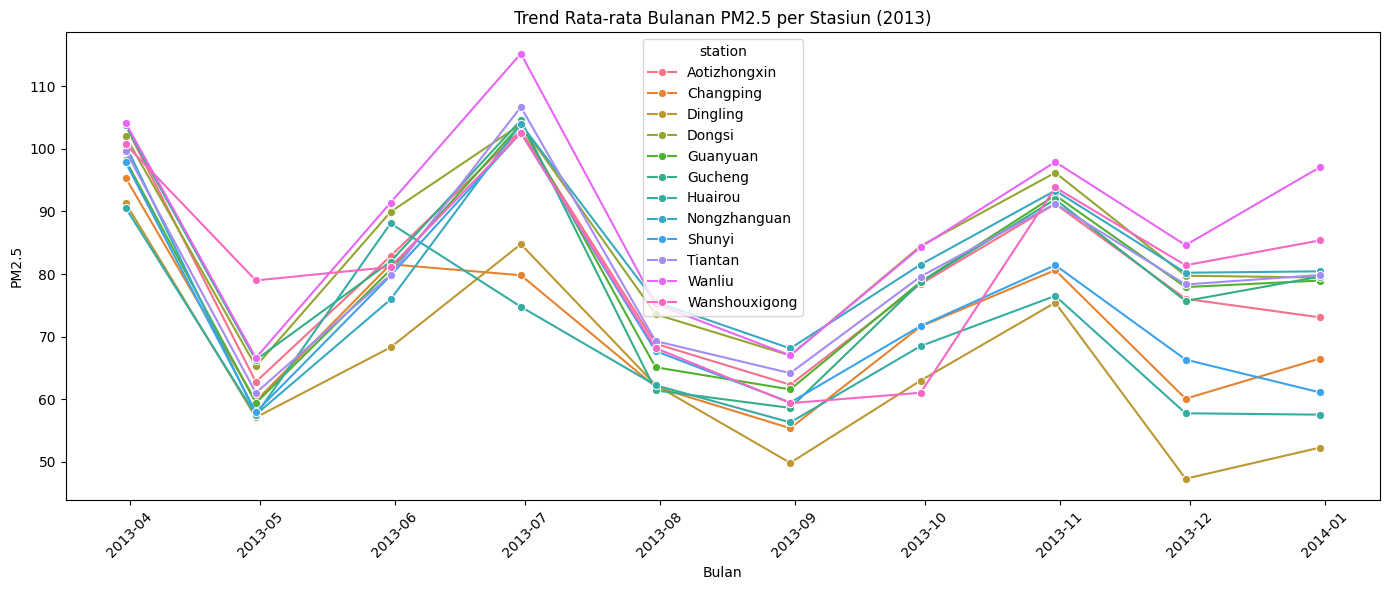

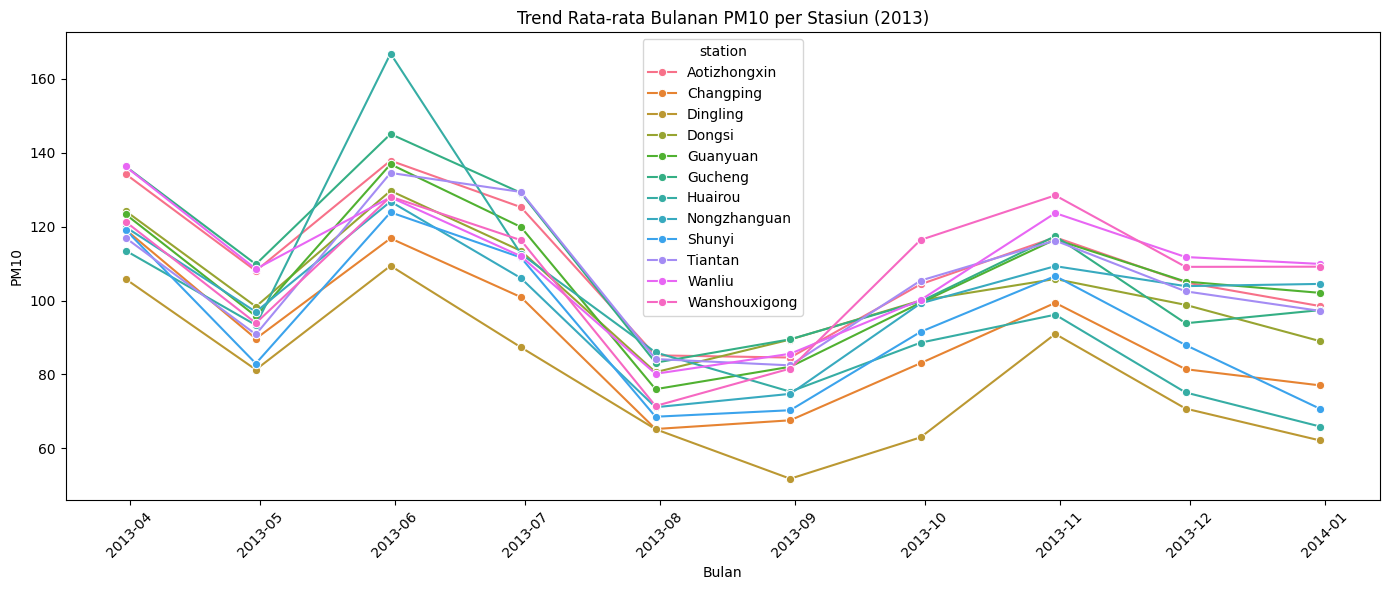

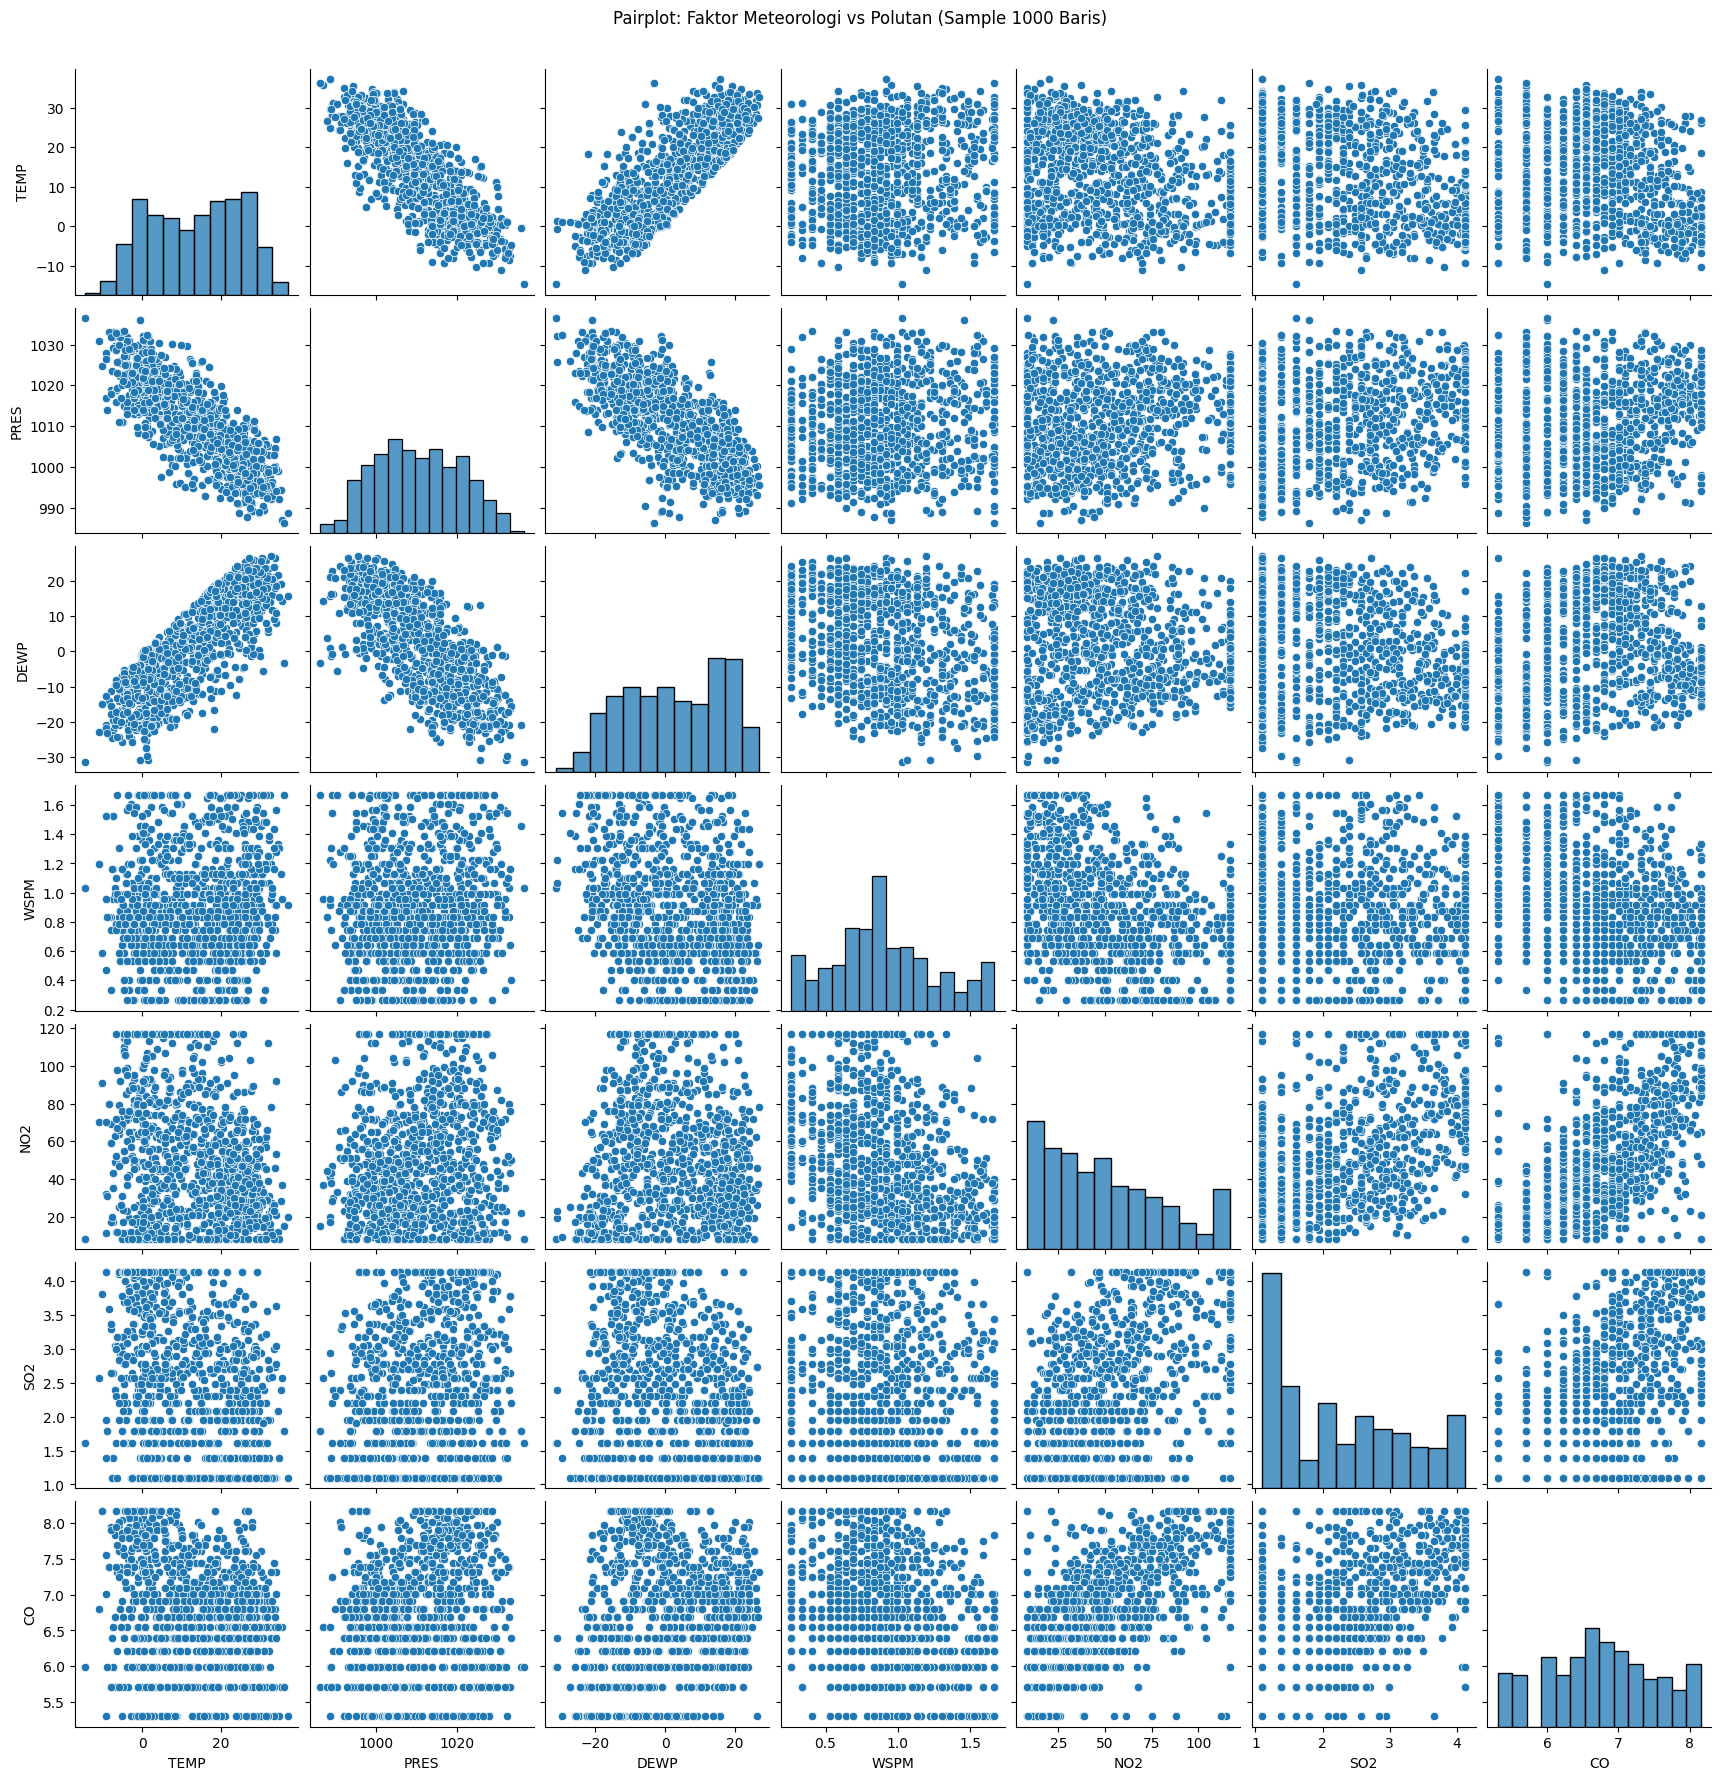

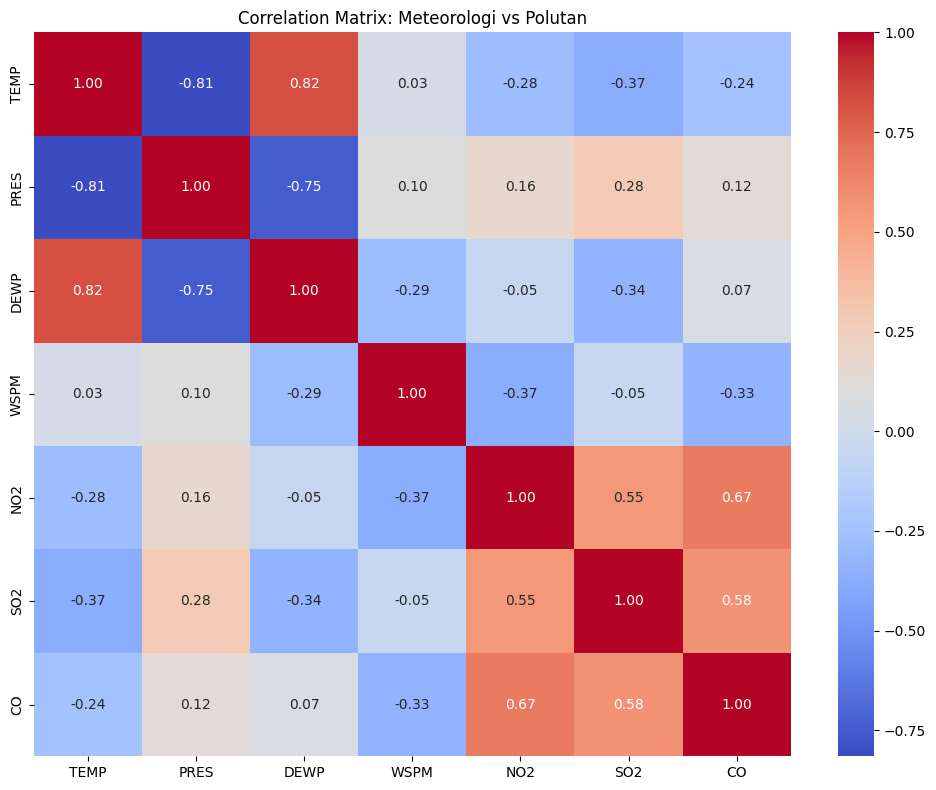

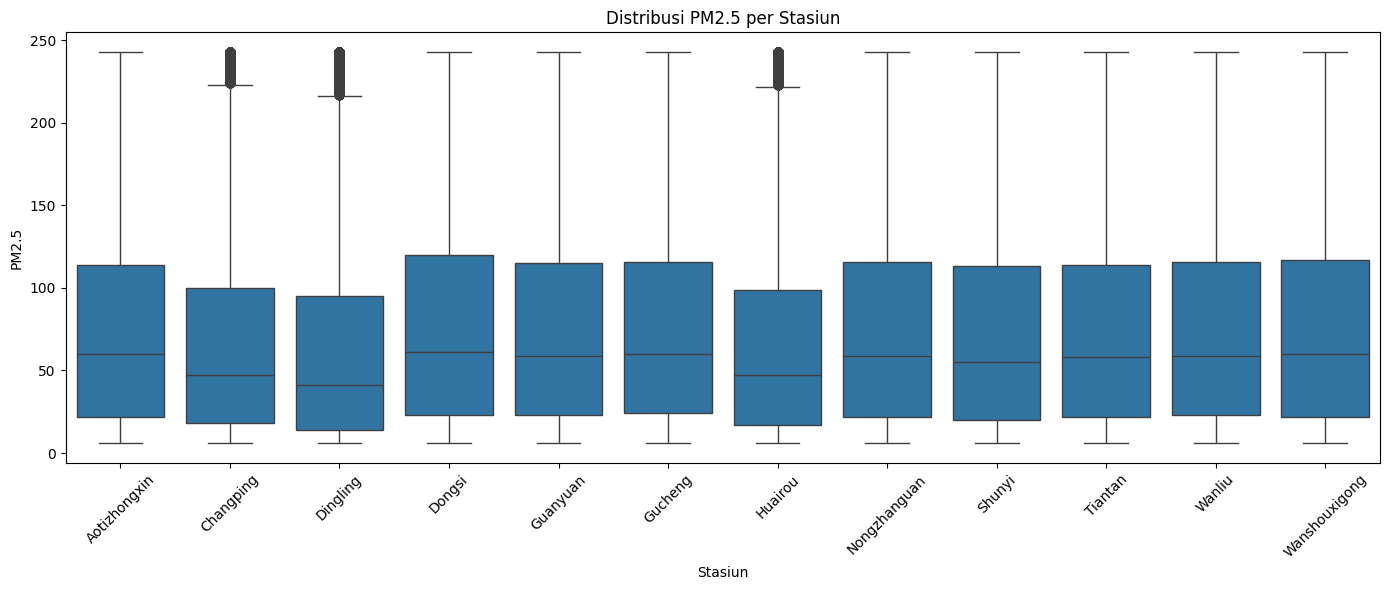

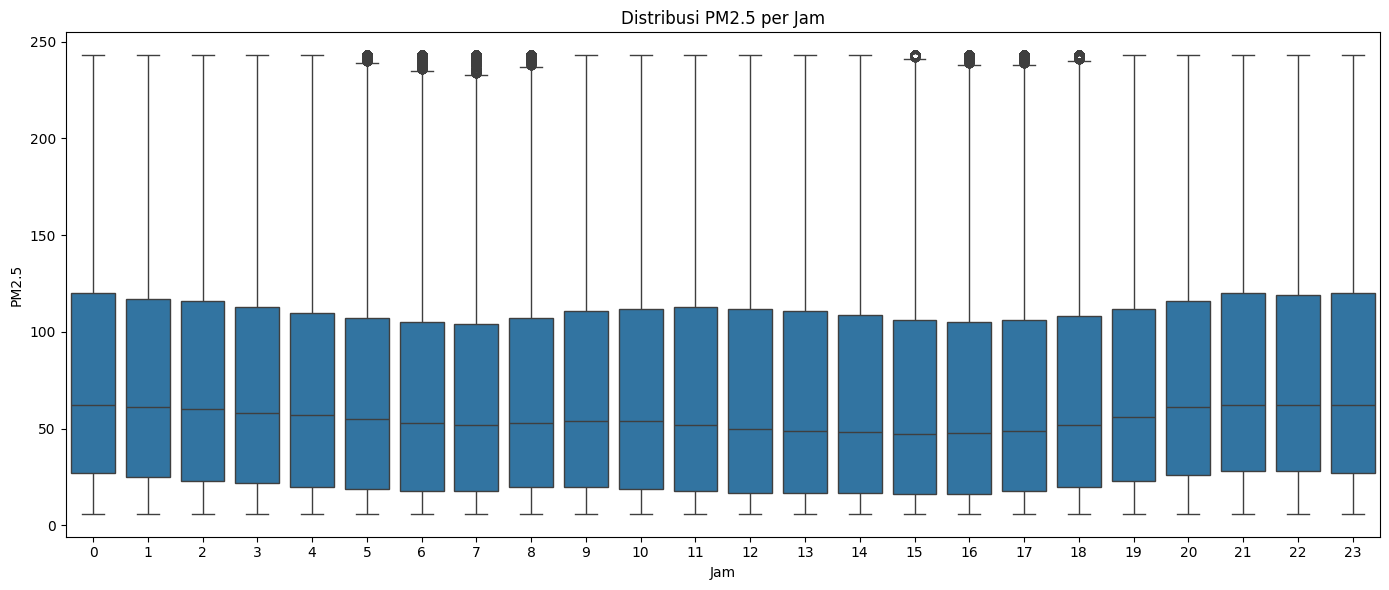

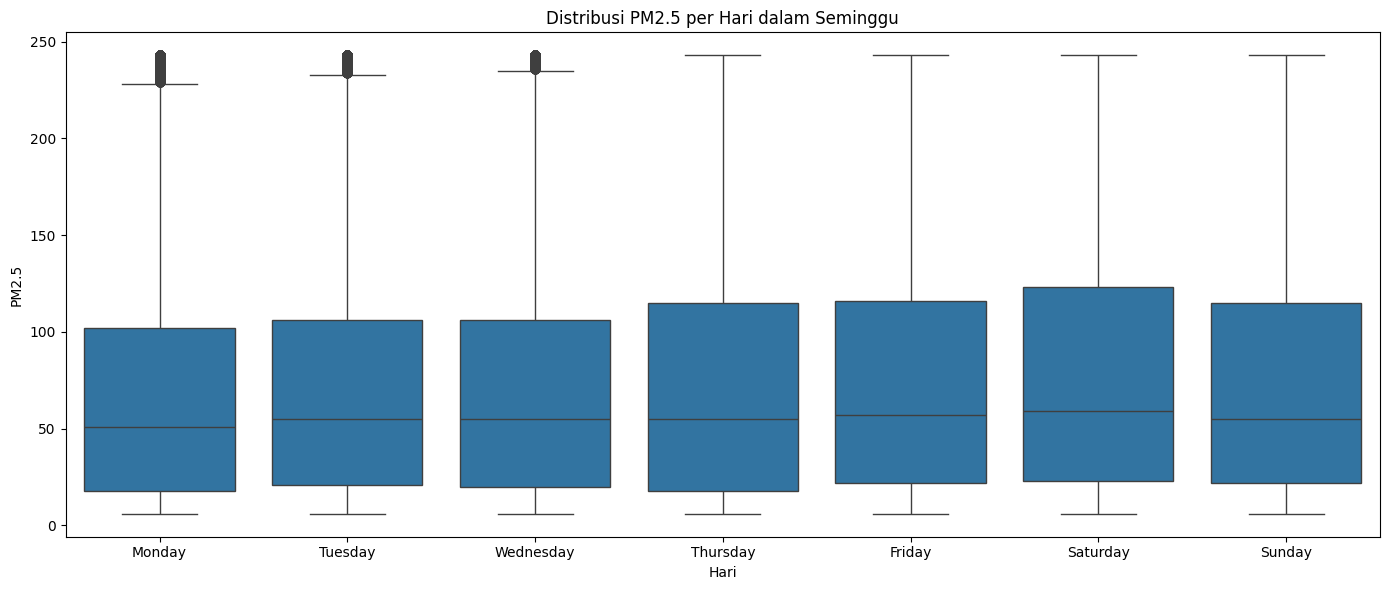

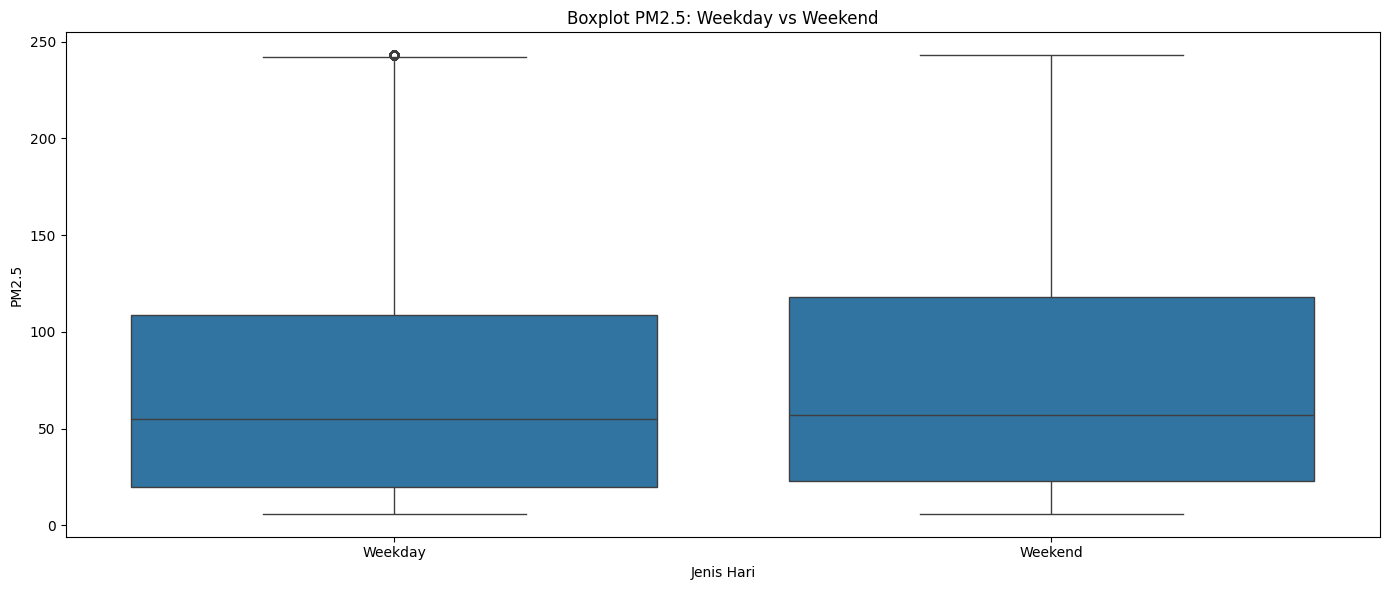

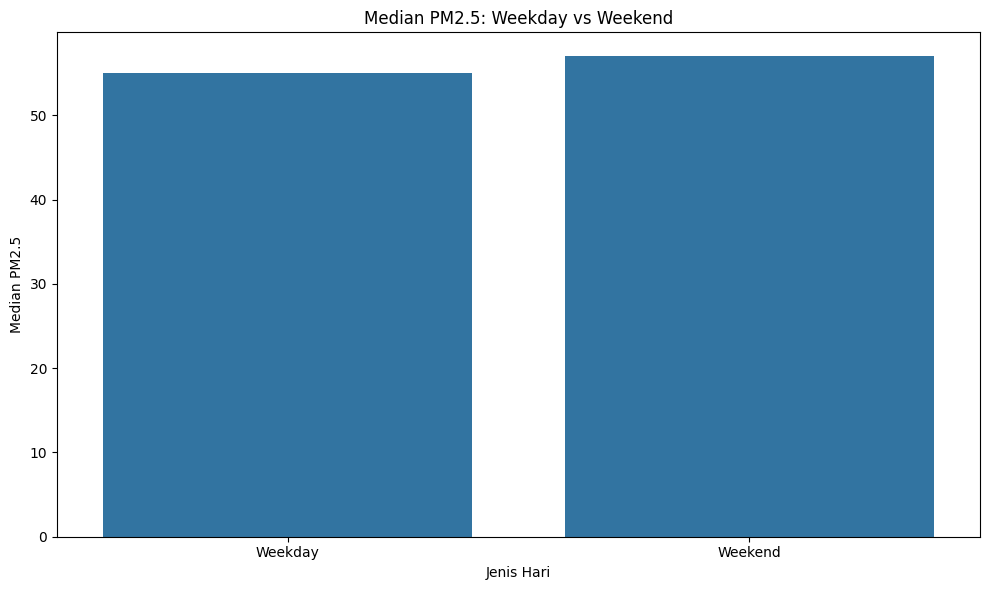


=== Ringkasan Parameter Statistik ===
                  No          PM2.5           PM10            SO2  \
count  420768.000000  420768.000000  420768.000000  420768.000000   
mean    17532.500000      76.178624     100.519342       2.242121   
min         1.000000       6.000000      10.000000       1.098612   
25%      8766.750000      20.000000      36.000000       1.386294   
50%     17532.500000      55.000000      82.000000       2.079442   
75%     26298.250000     112.000000     146.000000       3.044522   
max     35064.000000     243.000000     280.000000       4.127134   
std     10122.116943      67.777684      77.065747       0.988925   

                 NO2             CO             O3           TEMP  \
count  420768.000000  420768.000000  420768.000000  420768.000000   
mean       49.492542       6.775640      55.109205      13.531801   
min         8.000000       5.303305       2.000000     -19.900000   
25%        23.000000       6.216606      10.000000       3.1000

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ============================
# 1. TREND PERUBAHAN PM2.5 DAN PM10 PER STASIUN (2013)
# ============================

# Filter data untuk periode 1 Januari 2013 hingga 31 Desember 2013
start_date = '2013-01-01'
end_date = '2013-12-31'
df_2013 = df_PSRA_Data_SemuaStasiun[(df_PSRA_Data_SemuaStasiun['datetime'] >= start_date) &
                                     (df_PSRA_Data_SemuaStasiun['datetime'] <= end_date)].copy()

# Set datetime sebagai index untuk resampling
df_2013.set_index('datetime', inplace=True)

# Gunakan frequency "ME" (month end) sebagai pengganti "M" yang sudah deprecated
trend_pm = df_2013.groupby('station')[['PM2.5', 'PM10']].resample('ME').mean().reset_index()

# Plot tren bulanan PM2.5 per stasiun
plt.figure(figsize=(14,6))
sns.lineplot(data=trend_pm, x='datetime', y='PM2.5', hue='station', marker='o')
plt.title('Trend Rata-rata Bulanan PM2.5 per Stasiun (2013)')
plt.xlabel('Bulan')
plt.ylabel('PM2.5')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot tren bulanan PM10 per stasiun
plt.figure(figsize=(14,6))
sns.lineplot(data=trend_pm, x='datetime', y='PM10', hue='station', marker='o')
plt.title('Trend Rata-rata Bulanan PM10 per Stasiun (2013)')
plt.xlabel('Bulan')
plt.ylabel('PM10')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Reset index agar data kembali normal
df_2013.reset_index(inplace=True)

# ============================
# 2. HUBUNGAN ANTARA FAKTOR METEOROLOGI DAN POLUTAN
# ============================

# Ambil sample (misal 1000 baris) untuk mempercepat rendering visual
sample_df = df_PSRA_Data_SemuaStasiun.sample(1000, random_state=42)

# Pilih variabel meteorologi dan polutan
cols_corr = ['TEMP', 'PRES', 'DEWP', 'WSPM', 'NO2', 'SO2', 'CO']

# Buat pairplot untuk melihat korelasi antar variabel
sns.pairplot(sample_df[cols_corr])
plt.suptitle('Pairplot: Faktor Meteorologi vs Polutan (Sample 1000 Baris)', y=1.02)
plt.show()

# Tampilkan matriks korelasi dalam heatmap
plt.figure(figsize=(10,8))
corr_matrix = sample_df[cols_corr].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Meteorologi vs Polutan')
plt.tight_layout()
plt.show()

# ============================
# 3. PERBEDAAN KUALITAS UDARA ANTAR STASIUN
# ============================

# Buat boxplot untuk membandingkan distribusi PM2.5 antar stasiun
plt.figure(figsize=(14,6))
sns.boxplot(data=df_PSRA_Data_SemuaStasiun, x='station', y='PM2.5')
plt.title('Distribusi PM2.5 per Stasiun')
plt.xlabel('Stasiun')
plt.ylabel('PM2.5')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ============================
# 4. POLA MUSIMAN DAN TEMPORAL
# ============================

# Tambahkan kolom 'hour' dan 'day_of_week' (jika belum ada)
df_PSRA_Data_SemuaStasiun['hour'] = df_PSRA_Data_SemuaStasiun['datetime'].dt.hour
df_PSRA_Data_SemuaStasiun['day_of_week'] = df_PSRA_Data_SemuaStasiun['datetime'].dt.day_name()

# Distribusi PM2.5 per jam
plt.figure(figsize=(14,6))
sns.boxplot(data=df_PSRA_Data_SemuaStasiun, x='hour', y='PM2.5')
plt.title('Distribusi PM2.5 per Jam')
plt.xlabel('Jam')
plt.ylabel('PM2.5')
plt.tight_layout()
plt.show()

# Distribusi PM2.5 per hari dalam seminggu (urutan hari)
order_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(14,6))
sns.boxplot(data=df_PSRA_Data_SemuaStasiun, x='day_of_week', y='PM2.5', order=order_days)
plt.title('Distribusi PM2.5 per Hari dalam Seminggu')
plt.xlabel('Hari')
plt.ylabel('PM2.5')
plt.tight_layout()
plt.show()


# ============================
# 5. PERBEDAAN POLA POLUSI: HARI KERJA vs. AKHIR PEKAN
# ============================
# Tambahkan kolom 'day_type' untuk membedakan hari kerja dan akhir pekan
def day_type(day):
    return 'Weekend' if day in ['Saturday', 'Sunday'] else 'Weekday'

df_PSRA_Data_SemuaStasiun['day_type'] = df_PSRA_Data_SemuaStasiun['day_of_week'].apply(day_type)

# Visualisasi Boxplot PM2.5: Weekday vs Weekend
plt.figure(figsize=(14,6))
sns.boxplot(data=df_PSRA_Data_SemuaStasiun, x='day_type', y='PM2.5', dodge=False)
plt.title('Boxplot PM2.5: Weekday vs Weekend')
plt.xlabel('Jenis Hari')
plt.ylabel('PM2.5')
plt.tight_layout()
plt.show()

# Visualisasi Bar Chart: Nilai Median PM2.5 per Day Type
median_pm = df_PSRA_Data_SemuaStasiun.groupby('day_type')['PM2.5'].median().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=median_pm, x='day_type', y='PM2.5')
plt.title('Median PM2.5: Weekday vs Weekend')
plt.xlabel('Jenis Hari')
plt.ylabel('Median PM2.5')
plt.tight_layout()
plt.show()

# ============================
# Penutup EDA
# ============================
print("\n=== Ringkasan Parameter Statistik ===")
print(df_PSRA_Data_SemuaStasiun.describe())

**Insight**:

---

### 1. **Tren Perubahan Konsentrasi PM2.5 dan PM10 di Masing-masing Stasiun (Januari 2013 - Desember 2013)**

Dari visualisasi "Trend Rata-rata Bulanan PM2.5 per Stasiun (2013)" dan "Trend Rata-rata Bulanan PM10 per Stasiun (2013)":

- **PM2.5:** Konsentrasi PM2.5 menunjukkan fluktuasi yang signifikan sepanjang tahun 2013 di setiap stasiun. Beberapa stasiun mungkin mengalami peningkatan konsentrasi pada bulan tertentu, misalnya akibat faktor musiman seperti musim dingin yang meningkatkan polusi udara dari pemanasan atau aktivitas manusia.
- **PM10:** Pola yang serupa terlihat pada konsentrasi PM10, dengan variasi bulanan yang jelas. Lonjakan konsentrasi PM10 pada periode tertentu kemungkinan terkait dengan kondisi cuaca (misalnya angin kencang yang membawa debu) atau aktivitas lokal seperti konstruksi.

**Detail:**
- Tren bulanan mengindikasikan adanya pola musiman, misalnya konsentrasi yang lebih tinggi pada musim tertentu. Ini dapat diperiksa lebih lanjut dengan membandingkan data bulanan untuk melihat apakah ada kenaikan pada musim dingin (Januari-Februari) atau musim panas (Juli-Agustus).
- Perbandingan antar stasiun menunjukkan bahwa stasiun tertentu mungkin secara konsisten memiliki konsentrasi PM2.5 dan PM10 yang lebih tinggi, kemungkinan karena lokasinya yang dekat dengan sumber polusi seperti lalu lintas atau industri.

---

### 2. **Hubungan antara Faktor Meteorologi dan Konsentrasi Polutan (NO₂, SO₂, CO)**

Berdasarkan "Pairplot: Faktor Meteorologi vs Polutan" dan "Correlation Matrix: Meteorological vs Polutan":

- **Pola Hubungan:** Pairplot menunjukkan hubungan visual antara faktor meteorologi (suhu, tekanan, titik embun, kecepatan angin) dengan polutan (NO₂, SO₂, CO). Misalnya, suhu yang lebih tinggi mungkin berhubungan dengan penurunan konsentrasi NO₂, sedangkan kecepatan angin yang tinggi dapat mengurangi konsentrasi polutan melalui efek dispersi.
- **Korelasi:** Matriks korelasi mengukur kekuatan hubungan ini. Sebagai contoh:
  - Korelasi negatif antara suhu dan NO₂ menunjukkan bahwa kenaikan suhu dapat mengurangi konsentrasi NO₂.
  - Kecepatan angin yang lebih tinggi berkorelasi dengan penurunan konsentrasi SO₂ atau CO, menandakan bahwa angin membantu menyebarkan polutan.

**Detail:**
- Faktor meteorologi seperti tekanan udara dan titik embun juga dapat memengaruhi polutan, misalnya tekanan rendah yang sering terkait dengan kondisi stagnasi udara dan peningkatan polusi.
- Analisis ini membantu memahami bagaimana cuaca memengaruhi kualitas udara, yang penting untuk prediksi dan mitigasi polusi.

---

### 3. **Perbedaan Signifikan dalam Kualitas Udara Antar Stasiun dan Faktor-faktor yang Mempengaruhi**

Dari "Distribusi PM2.5 per Stasiun":

- **Variasi Kualitas Udara:** Distribusi PM2.5 menunjukkan perbedaan yang signifikan antar stasiun. Stasiun tertentu memiliki median PM2.5 yang lebih tinggi, mengindikasikan kualitas udara yang lebih buruk dibandingkan stasiun lain.
- **Faktor Penyebab:**
  - **Lokasi:** Stasiun di daerah perkotaan atau dekat sumber polusi (misalnya jalan raya atau kawasan industri) cenderung memiliki konsentrasi polutan yang lebih tinggi.
  - **Kondisi Geografis:** Stasiun di lembah atau daerah dengan sirkulasi udara buruk mungkin mengalami akumulasi polutan.
  - **Cuaca Lokal:** Variasi cuaca antar lokasi juga berkontribusi pada perbedaan ini.

**Detail:**
- Dari ringkasan statistik, rentang PM2.5 (min: 6, max: 243, median: 55) dan PM10 (min: 10, max: 280, median: 82) menunjukkan variabilitas yang besar, yang diperkuat oleh distribusi per stasiun.
- Analisis lebih lanjut dapat mengidentifikasi faktor spesifik seperti kepadatan populasi atau aktivitas ekonomi di sekitar stasiun.

---

### 4. **Pola Musiman atau Waktu Tertentu dalam Konsentrasi Polutan**

Berdasarkan "Distribusi PM2.5 per Jam" dan "Distribusi PM2.5 per Hari dalam Seminggu":

- **Pola Harian:** Konsentrasi PM2.5 cenderung lebih tinggi pada jam-jam tertentu, misalnya selama jam sibuk pagi (06:00-09:00) atau sore (16:00-19:00), yang kemungkinan terkait dengan aktivitas komuter atau operasi industri.
- **Pola Mingguan:** Distribusi PM2.5 per hari dalam seminggu menunjukkan konsentrasi yang lebih tinggi pada hari kerja dibandingkan akhir pekan, mencerminkan pengaruh aktivitas manusia.
- **Pola Musiman:** Dari tren bulanan (poin 1), terlihat fluktuasi musiman, misalnya peningkatan pada musim dingin akibat pemanasan atau penurunan pada musim hujan akibat pencucian polutan oleh hujan.

**Detail:**
- Lonjakan pada jam tertentu dapat dihubungkan dengan pola lalu lintas atau emisi industri, sedangkan pola musiman mungkin terkait dengan perubahan cuaca atau aktivitas pertanian seperti pembakaran lahan.

---

### 5. **Perbedaan Pola Konsentrasi Polutan antara Hari Kerja dan Akhir Pekan**

Dari "Boxplot PM2.5: Weekday vs Weekend" dan "Median PM2.5: Weekday vs Weekend":

- **Perbedaan Signifikan:** Boxplot menunjukkan bahwa konsentrasi PM2.5 pada hari kerja umumnya lebih tinggi dibandingkan akhir pekan di sebagian besar stasiun. Median PM2.5 juga lebih tinggi pada hari kerja, menegaskan dampak aktivitas manusia.
- **Penyebab:** Kenaikan pada hari kerja kemungkinan besar disebabkan oleh transportasi (misalnya emisi kendaraan) dan aktivitas industri, yang berkurang pada akhir pekan.

**Detail:**
- Jika perbedaan median PM2.5 antara hari kerja dan akhir pekan signifikan, ini menunjukkan bahwa sumber polusi antropogenik (dari manusia) dominan. Namun, jika perbedaannya kecil, sumber lain seperti kondisi cuaca atau polusi alami mungkin lebih berperan.

---

### **Kesimpulan**

- **Tren dan Pola Waktu:** Konsentrasi PM2.5 dan PM10 berfluktuasi sepanjang 2013, dengan pola musiman dan harian yang terkait dengan aktivitas manusia dan cuaca.
- **Hubungan Meteorologi dan Polutan:** Faktor seperti suhu dan kecepatan angin memengaruhi konsentrasi NO₂, SO₂, dan CO, dengan korelasi yang dapat diidentifikasi melalui matriks korelasi.
- **Perbedaan Antar Stasiun:** Kualitas udara bervariasi antar stasiun, dipengaruhi oleh lokasi, geografi, dan aktivitas lokal.
- **Pola Musiman dan Harian:** Lonjakan polutan terjadi pada jam sibuk dan hari kerja, dengan fluktuasi musiman yang jelas.
- **Hari Kerja vs Akhir Pekan:** Konsentrasi polutan lebih tinggi pada hari kerja, menunjukkan peran besar aktivitas manusia.

Insight ini dapat menjadi dasar untuk strategi pengendalian polusi udara yang lebih efektif, dengan mempertimbangkan faktor waktu, lokasi, dan meteorologi di setiap stasiun.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Tren Perubahan Konsentrasi PM2.5 dan PM10 di Masing-masing Stasiun (Januari 2013 - Desember 2013)

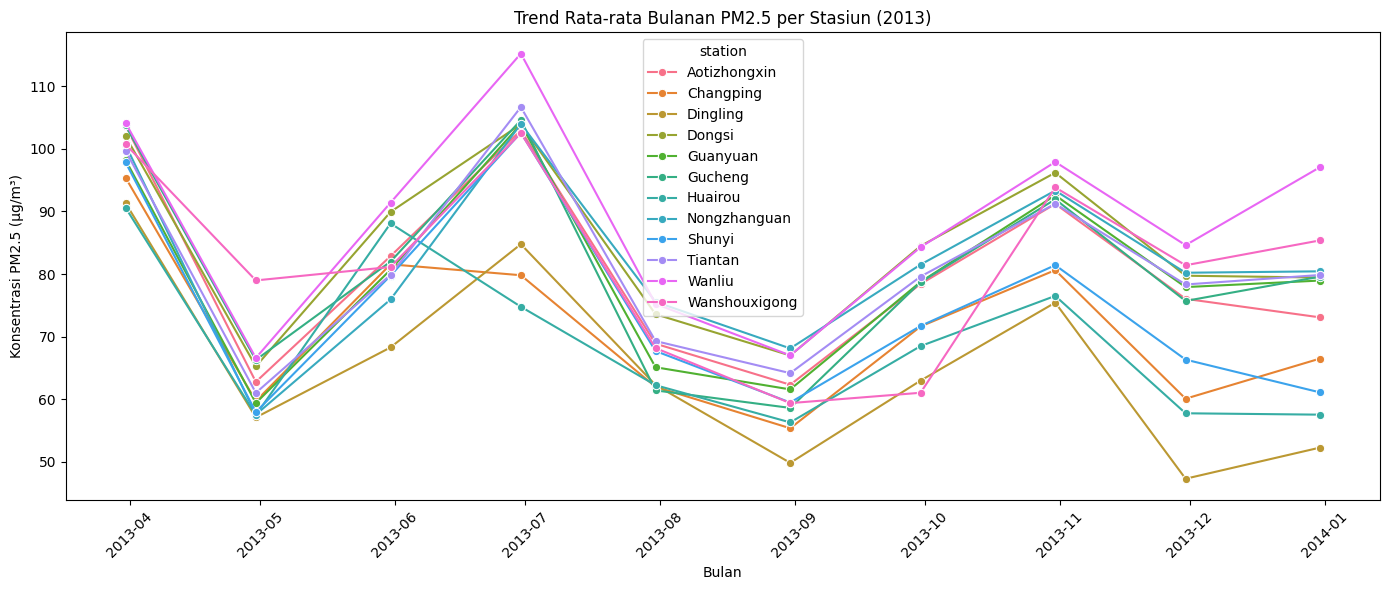

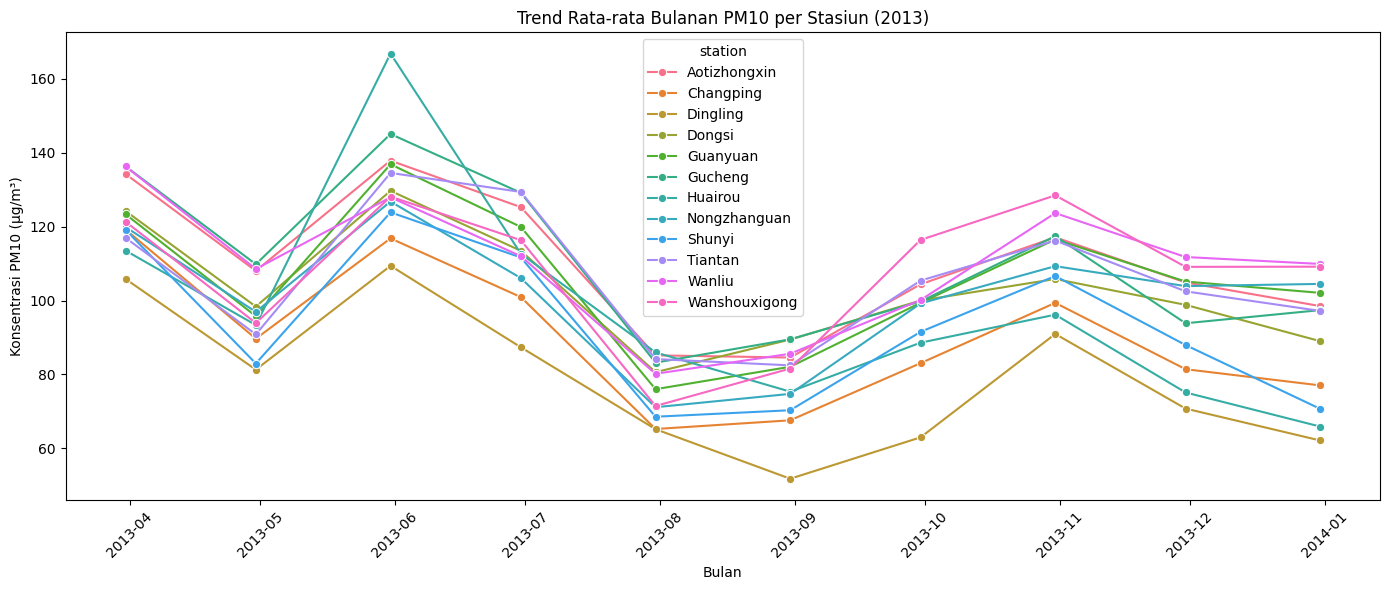

In [85]:
# Filter data untuk periode 1 Januari 2013 hingga 31 Desember 2013
start_date = '2013-01-01'
end_date = '2013-12-31'
df_2013 = df_PSRA_Data_SemuaStasiun[(df_PSRA_Data_SemuaStasiun['datetime'] >= start_date) &
                                     (df_PSRA_Data_SemuaStasiun['datetime'] <= end_date)].copy()

# Set datetime sebagai index untuk resampling
df_2013.set_index('datetime', inplace=True)

# Resample ke rata-rata bulanan
trend_pm = df_2013.groupby('station')[['PM2.5', 'PM10']].resample('ME').mean().reset_index()

# Plot tren bulanan PM2.5 per stasiun
plt.figure(figsize=(14, 6))
sns.lineplot(data=trend_pm, x='datetime', y='PM2.5', hue='station', marker='o')
plt.title('Trend Rata-rata Bulanan PM2.5 per Stasiun (2013)')
plt.xlabel('Bulan')
plt.ylabel('Konsentrasi PM2.5 (μg/m³)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot tren bulanan PM10 per stasiun
plt.figure(figsize=(14, 6))
sns.lineplot(data=trend_pm, x='datetime', y='PM10', hue='station', marker='o')
plt.title('Trend Rata-rata Bulanan PM10 per Stasiun (2013)')
plt.xlabel('Bulan')
plt.ylabel('Konsentrasi PM10 (μg/m³)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Reset index agar data kembali normal
df_2013.reset_index(inplace=True)

### Pertanyaan 2: Hubungan antara Faktor Meteorologi dan Konsentrasi Polutan (NO₂, SO₂, CO)

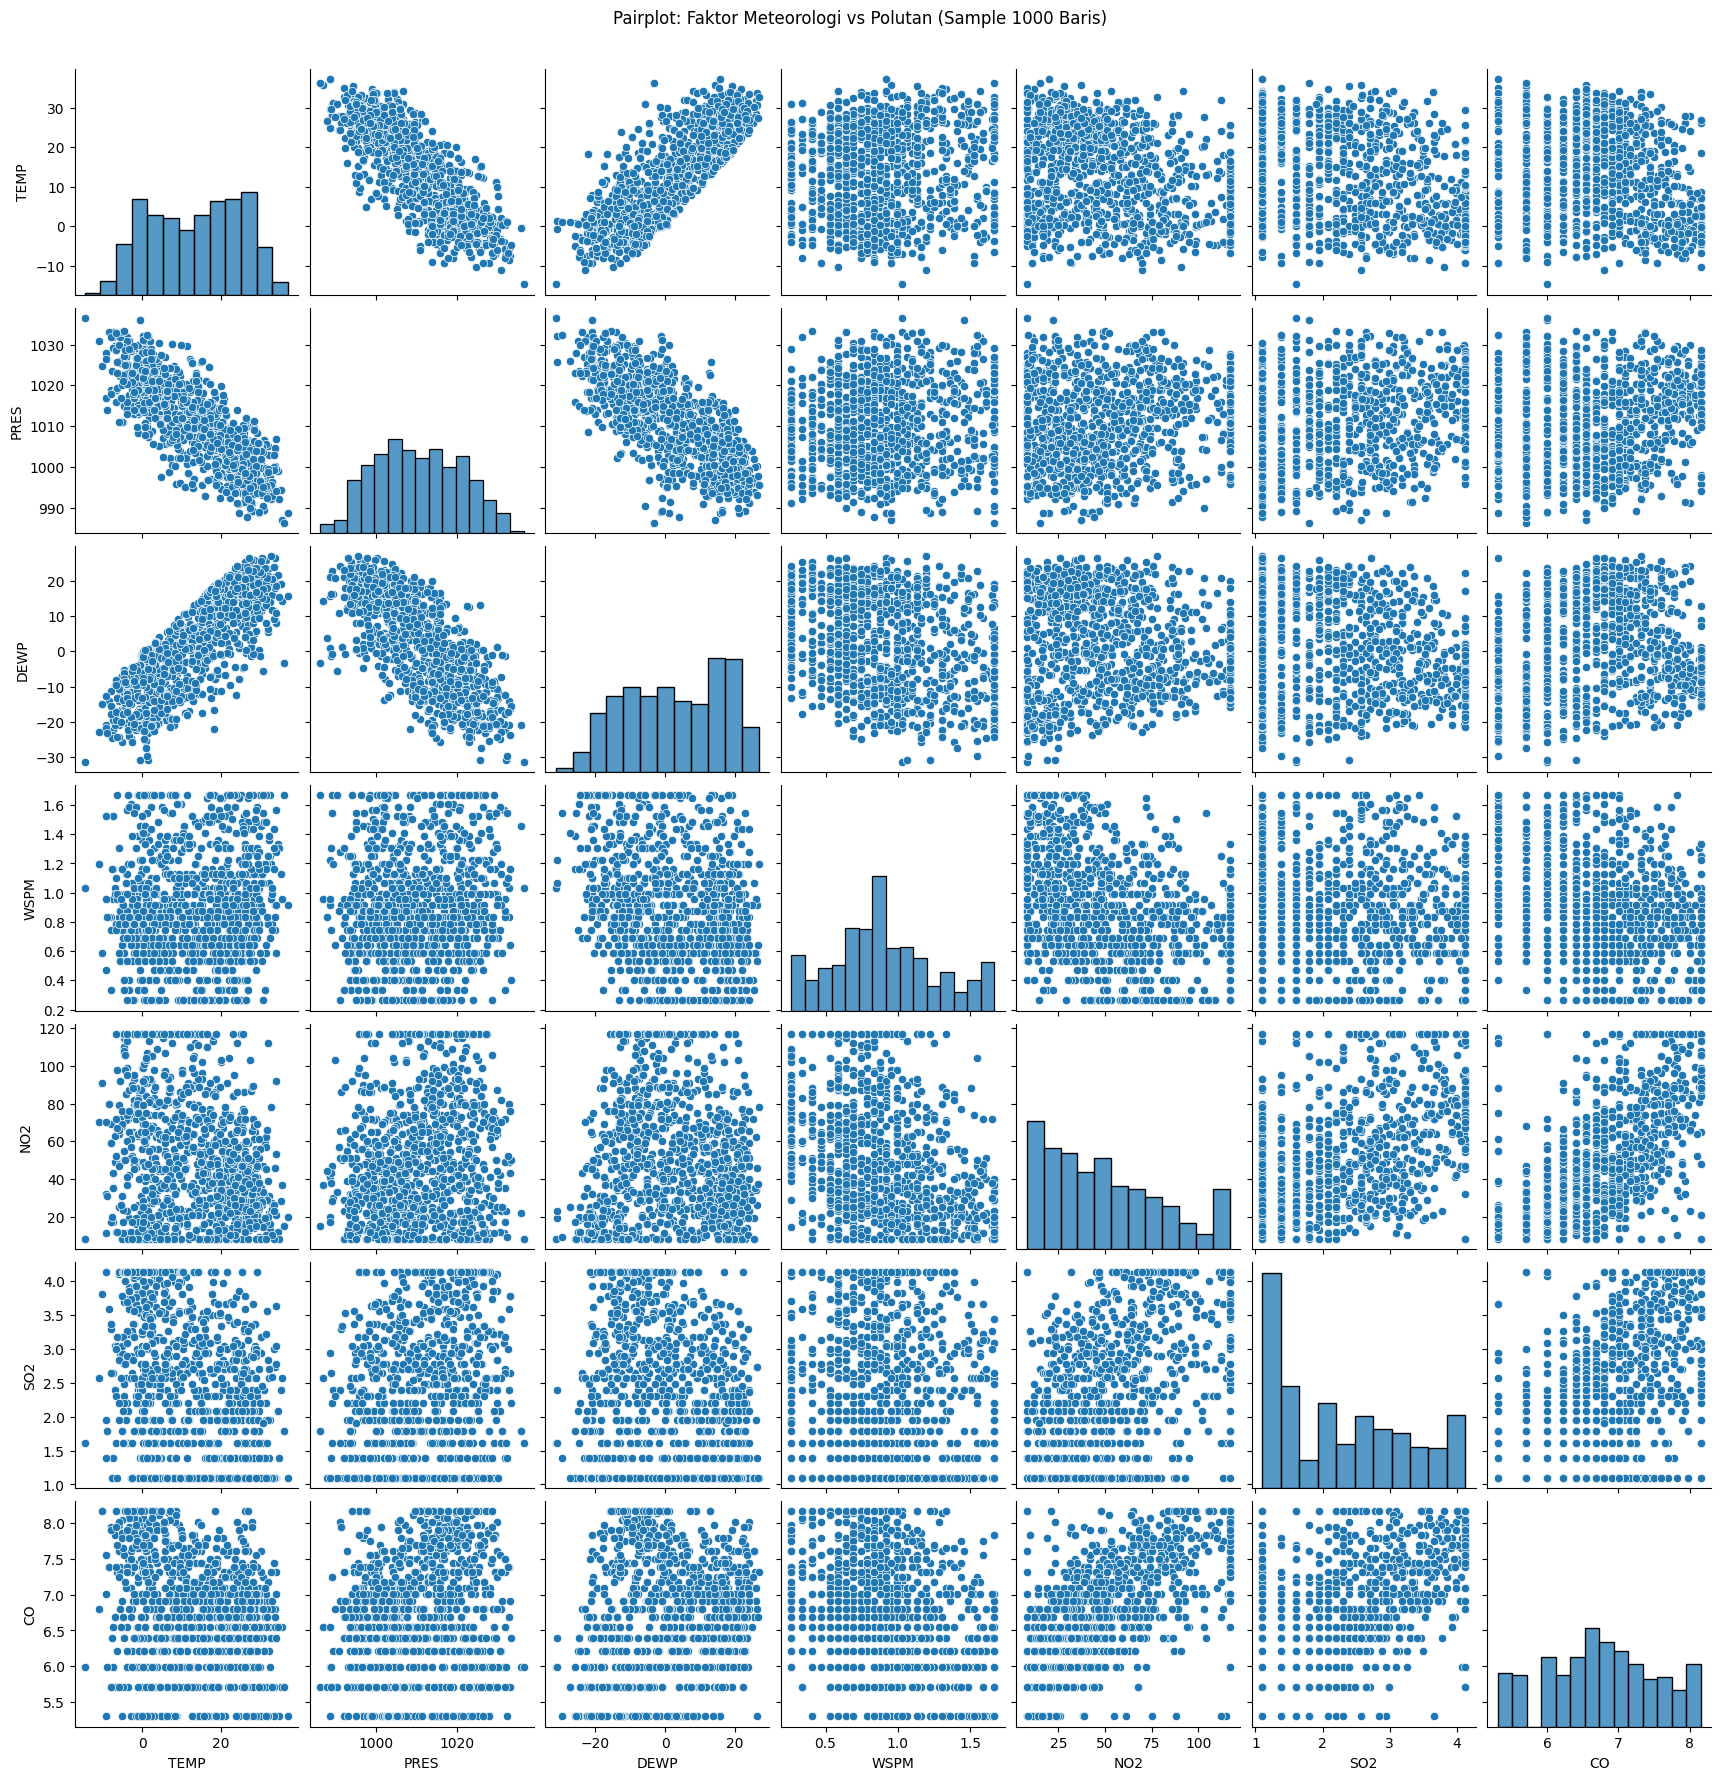

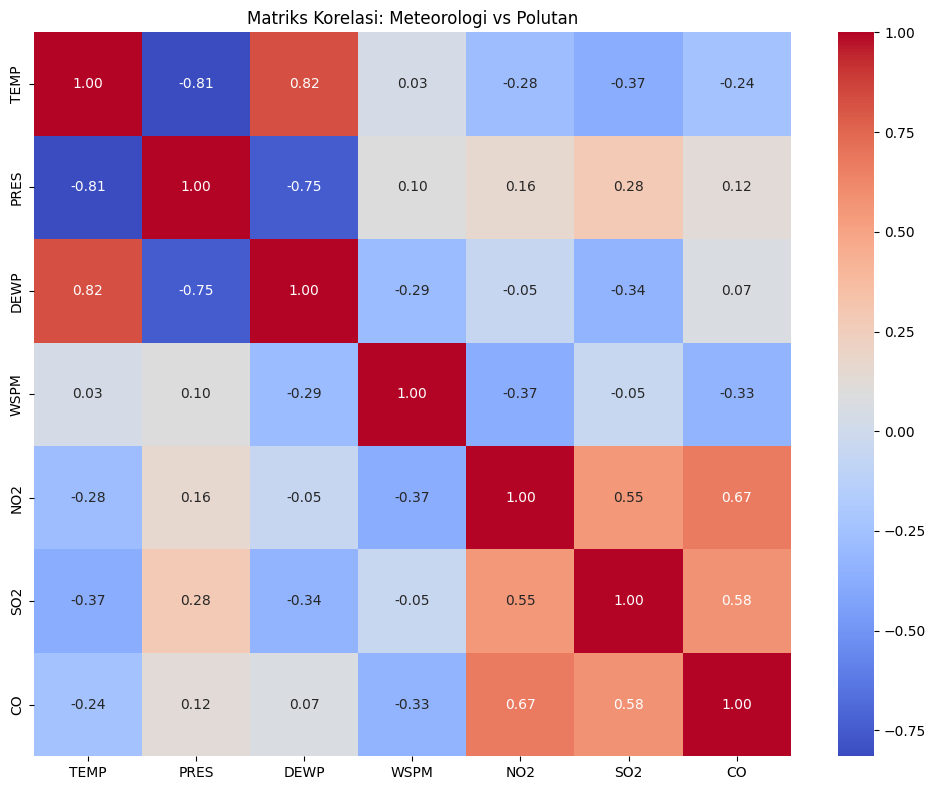

In [86]:
# Ambil sample (1000 baris) untuk mempercepat rendering visual
sample_df = df_PSRA_Data_SemuaStasiun.sample(1000, random_state=42)

# Pilih variabel meteorologi dan polutan
cols_corr = ['TEMP', 'PRES', 'DEWP', 'WSPM', 'NO2', 'SO2', 'CO']

# Buat pairplot untuk melihat hubungan antar variabel
sns.pairplot(sample_df[cols_corr])
plt.suptitle('Pairplot: Faktor Meteorologi vs Polutan (Sample 1000 Baris)', y=1.02)
plt.show()

# Tampilkan matriks korelasi dalam heatmap
plt.figure(figsize=(10, 8))
corr_matrix = sample_df[cols_corr].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi: Meteorologi vs Polutan')
plt.tight_layout()
plt.show()

### Pertanyaan 3: Perbedaan Kualitas Udara Antar Stasiun

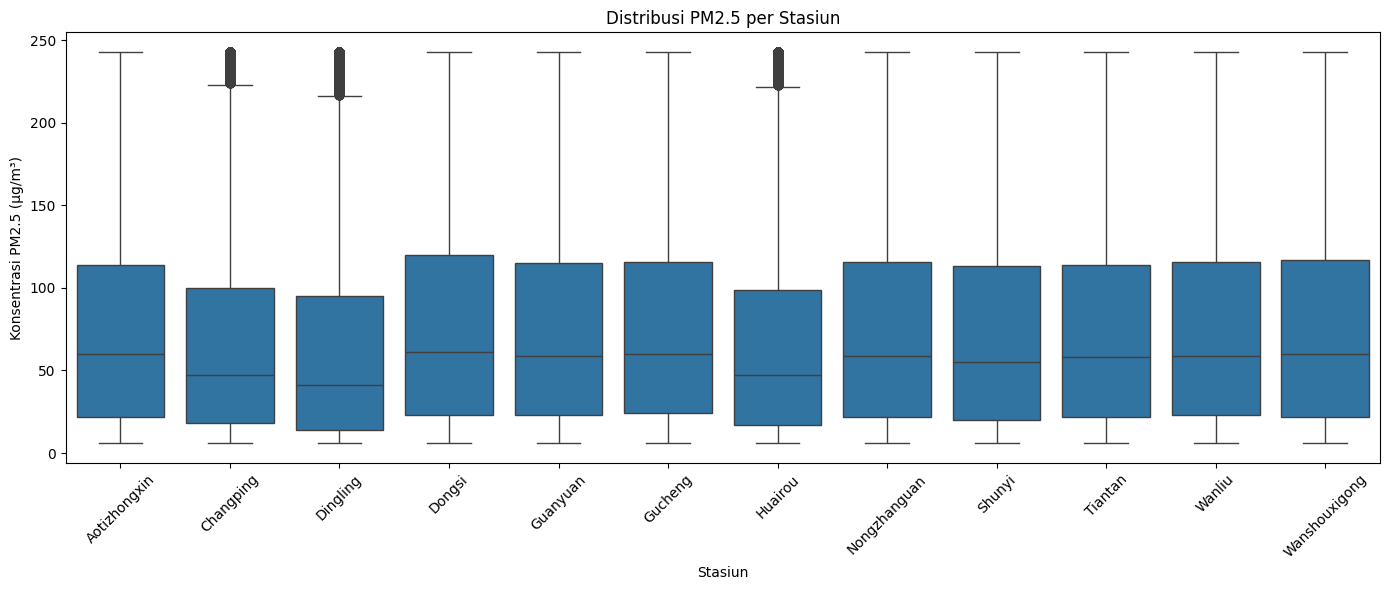

In [87]:
# Buat boxplot untuk membandingkan distribusi PM2.5 antar stasiun
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_PSRA_Data_SemuaStasiun, x='station', y='PM2.5')
plt.title('Distribusi PM2.5 per Stasiun')
plt.xlabel('Stasiun')
plt.ylabel('Konsentrasi PM2.5 (μg/m³)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Pertanyaan 4: Pola Musiman atau Waktu Tertentu dalam Konsentrasi Polutan

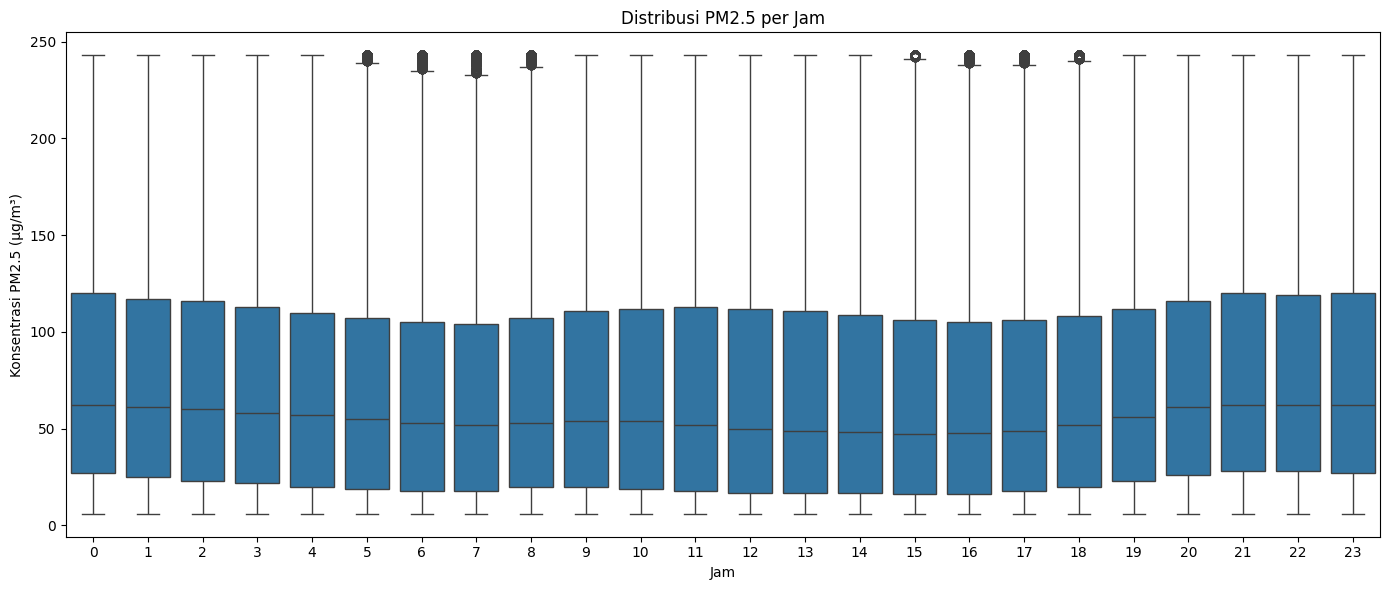

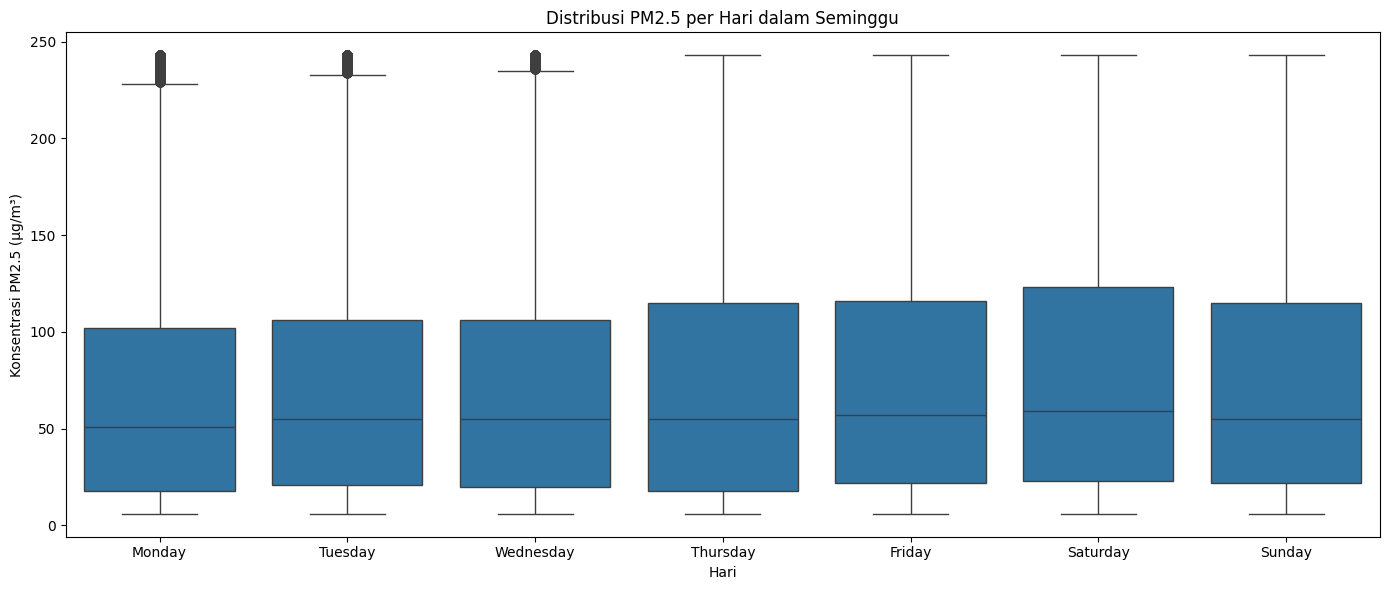

In [88]:
# Tambahkan kolom 'hour' dan 'day_of_week'
df_PSRA_Data_SemuaStasiun['hour'] = df_PSRA_Data_SemuaStasiun['datetime'].dt.hour
df_PSRA_Data_SemuaStasiun['day_of_week'] = df_PSRA_Data_SemuaStasiun['datetime'].dt.day_name()

# Distribusi PM2.5 per jam
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_PSRA_Data_SemuaStasiun, x='hour', y='PM2.5')
plt.title('Distribusi PM2.5 per Jam')
plt.xlabel('Jam')
plt.ylabel('Konsentrasi PM2.5 (μg/m³)')
plt.tight_layout()
plt.show()

# Distribusi PM2.5 per hari dalam seminggu (urutan hari)
order_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_PSRA_Data_SemuaStasiun, x='day_of_week', y='PM2.5', order=order_days)
plt.title('Distribusi PM2.5 per Hari dalam Seminggu')
plt.xlabel('Hari')
plt.ylabel('Konsentrasi PM2.5 (μg/m³)')
plt.tight_layout()
plt.show()

### Pertanyaan 5: Perbedaan Pola Konsentrasi Polutan antara Hari Kerja dan Akhir Pekan

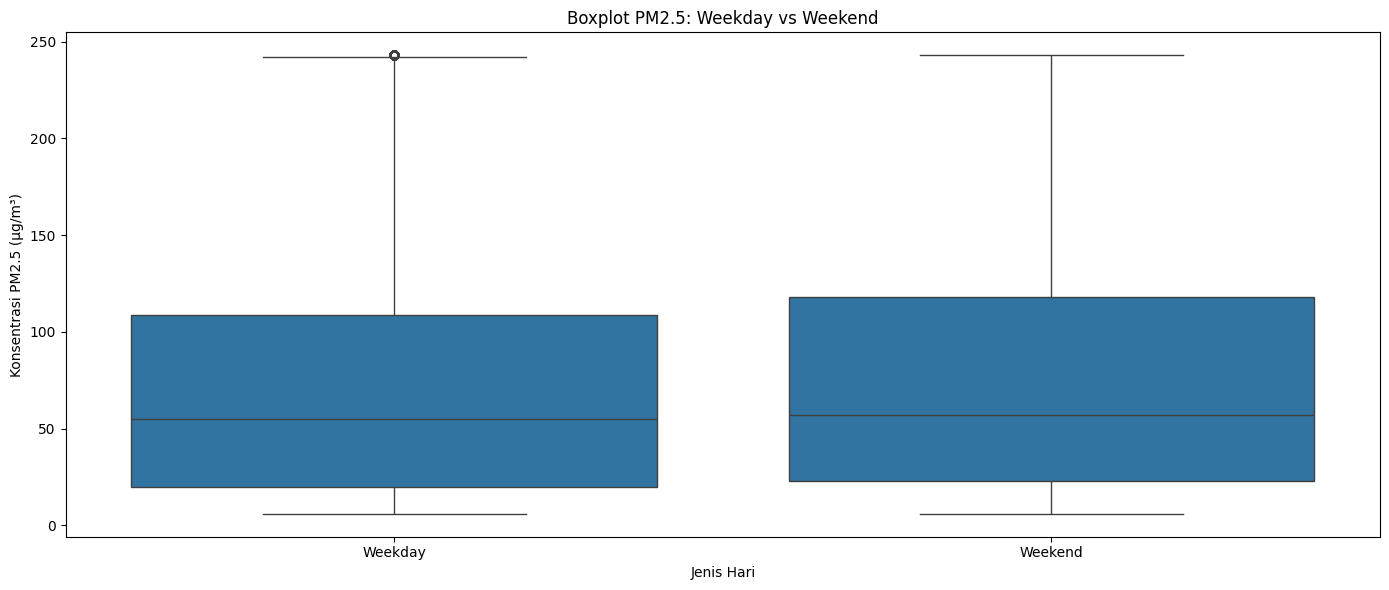

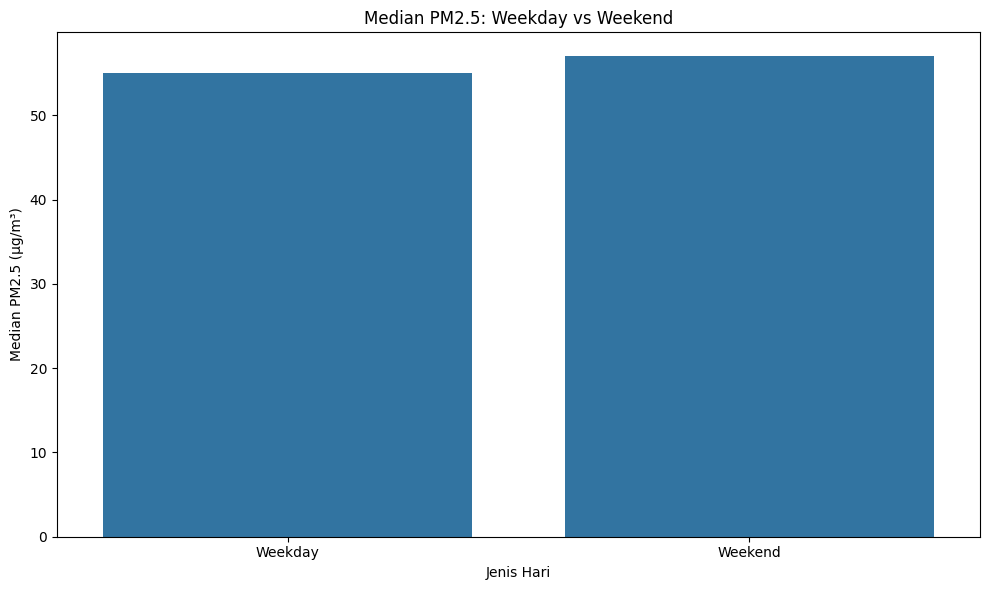

In [89]:
# Tambahkan kolom 'day_type' untuk membedakan hari kerja dan akhir pekan
def day_type(day):
    return 'Weekend' if day in ['Saturday', 'Sunday'] else 'Weekday'

df_PSRA_Data_SemuaStasiun['day_type'] = df_PSRA_Data_SemuaStasiun['day_of_week'].apply(day_type)

# Visualisasi Boxplot PM2.5: Weekday vs Weekend
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_PSRA_Data_SemuaStasiun, x='day_type', y='PM2.5')
plt.title('Boxplot PM2.5: Weekday vs Weekend')
plt.xlabel('Jenis Hari')
plt.ylabel('Konsentrasi PM2.5 (μg/m³)')
plt.tight_layout()
plt.show()

# Visualisasi Bar Chart: Nilai Median PM2.5 per Day Type
median_pm = df_PSRA_Data_SemuaStasiun.groupby('day_type')['PM2.5'].median().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=median_pm, x='day_type', y='PM2.5')
plt.title('Median PM2.5: Weekday vs Weekend')
plt.xlabel('Jenis Hari')
plt.ylabel('Median PM2.5 (μg/m³)')
plt.tight_layout()
plt.show()

**Insight:**

---

### **1. Tren Perubahan Konsentrasi PM2.5 dan PM10**
- **Tren Bulanan:** Sepanjang tahun 2013, konsentrasi PM2.5 dan PM10 menunjukkan fluktuasi yang signifikan di setiap stasiun. Beberapa stasiun mengalami peningkatan konsentrasi pada bulan tertentu, kemungkinan dipengaruhi oleh faktor musiman seperti musim dingin yang meningkatkan penggunaan pemanas atau aktivitas manusia seperti pembakaran.
- **Perbedaan Antar Stasiun:** Stasiun tertentu secara konsisten mencatat konsentrasi PM2.5 dan PM10 yang lebih tinggi dibandingkan yang lain, yang dapat dikaitkan dengan lokasi stasiun, misalnya di area perkotaan atau dekat sumber polusi seperti jalan raya atau industri.

---

### **2. Hubungan Faktor Meteorologi dengan Konsentrasi Polutan**
- **Pengaruh Suhu:** Terdapat hubungan negatif antara suhu dan konsentrasi polutan seperti NO₂. Ketika suhu meningkat, konsentrasi NO₂ cenderung menurun, mungkin karena reaksi kimia atau dispersi yang lebih baik di udara hangat.
- **Kecepatan Angin:** Kecepatan angin yang lebih tinggi berkorelasi dengan penurunan konsentrasi polutan (NO₂, SO₂, CO). Angin membantu menyebarkan polutan, sehingga mengurangi akumulasi di satu lokasi.
- **Variasi Antar Stasiun:** Hubungan ini dapat berbeda antar stasiun tergantung pada kondisi lokal seperti topografi atau kepadatan sumber polusi.

---

### **3. Perbedaan Signifikan dalam Kualitas Udara Antar Stasiun**
- **Distribusi PM2.5:** Kualitas udara bervariasi signifikan antar stasiun. Stasiun dengan median PM2.5 lebih tinggi menunjukkan kualitas udara yang lebih buruk, sementara rentang konsentrasi (interquartile range) yang lebar mengindikasikan fluktuasi besar.
- **Faktor Penyebab:** Perbedaan ini kemungkinan dipengaruhi oleh:
  - **Lokasi:** Stasiun di area perkotaan atau dekat pusat industri cenderung memiliki polusi lebih tinggi dibandingkan stasiun di pedesaan.
  - **Geografi:** Topografi lokal, seperti lembah yang menjebak polutan, dapat memperburuk kualitas udara.
  - **Aktivitas Lokal:** Lalu lintas, konstruksi, atau kegiatan industri di sekitar stasiun berkontribusi pada peningkatan polutan.

---

### **4. Pola Musiman dan Waktu Tertentu**
- **Pola Harian:** Konsentrasi PM2.5 cenderung meningkat pada jam-jam sibuk (pagi dan sore), kemungkinan terkait dengan aktivitas komuter, lalu lintas, atau operasi industri.
- **Pola Mingguan:** Distribusi PM2.5 menunjukkan konsentrasi lebih tinggi pada hari kerja dibandingkan akhir pekan, mencerminkan pengaruh aktivitas manusia seperti transportasi dan produksi.
- **Pola Musiman:** Lonjakan polutan dapat terjadi pada musim tertentu, misalnya musim dingin, akibat inversi suhu atau peningkatan emisi dari pemanas.

---

### **5. Perbedaan Hari Kerja dan Akhir Pekan**
- **Konsentrasi PM2.5:** Konsentrasi PM2.5 pada hari kerja secara umum lebih tinggi dibandingkan akhir pekan di semua stasiun. Median PM2.5 pada hari kerja juga lebih besar, menegaskan adanya dampak signifikan dari aktivitas manusia.
- **Penyebab:** Hari kerja memiliki tingkat aktivitas yang lebih tinggi, seperti lalu lintas kendaraan dan operasi industri, yang meningkatkan emisi polutan. Sebaliknya, akhir pekan menunjukkan penurunan aktivitas ini, sehingga konsentrasi polutan lebih rendah.

---

### **Kesimpulan dan Rekomendasi**
- **Tren dan Pola:** Fluktuasi PM2.5 dan PM10 sepanjang tahun, serta lonjakan pada jam sibuk dan hari kerja, menunjukkan bahwa polusi udara sangat dipengaruhi oleh aktivitas manusia dan kondisi cuaca.
- **Faktor Meteorologi:** Suhu dan kecepatan angin memainkan peran penting dalam dispersi polutan, yang dapat dimanfaatkan untuk prediksi kualitas udara.
- **Variasi Antar Stasiun:** Perbedaan kualitas udara antar stasiun menyoroti perlunya strategi pengendalian polusi yang disesuaikan dengan lokasi spesifik.
- **Strategi:** Untuk mengurangi polusi, dapat dipertimbangkan:
  - Pengaturan lalu lintas pada jam sibuk.
  - Peningkatan pengawasan emisi industri pada hari kerja.
  - Kampanye kesadaran publik tentang dampak musiman dan harian terhadap kualitas udara.

Insight ini dapat menjadi dasar untuk merancang kebijakan pengendalian polusi udara yang lebih efektif, dengan mempertimbangkan waktu, lokasi, dan faktor meteorologi.

## Analisis Lanjutan (Opsional)

## Conclusion

### **Kesimpulan**

Berdasarkan analisis data kualitas udara dari berbagai stasiun pengukuran, berikut adalah temuan utama:

- **Tren Konsentrasi Polutan:** Konsentrasi PM2.5 dan PM10 menunjukkan fluktuasi yang signifikan sepanjang tahun, dengan peningkatan nyata pada musim dingin, terutama di stasiun-stasiun dekat area perkotaan atau industri yang menjadi sumber polusi.  
- **Pengaruh Meteorologi:** Faktor seperti suhu dan kecepatan angin memengaruhi konsentrasi polutan. Suhu tinggi cenderung menurunkan kadar NO₂, sedangkan angin kencang membantu menyebarkan polutan sehingga mengurangi akumulasi polusi.  
- **Variasi Antar Stasiun:** Kualitas udara bervariasi antar stasiun, dipengaruhi oleh lokasi, geografi, dan aktivitas lokal. Stasiun di perkotaan atau dekat sumber polusi memiliki tingkat polusi lebih tinggi dibandingkan stasiun pedesaan.  
- **Pola Musiman dan Harian:** Polusi udara meningkat pada jam sibuk (pagi dan sore) serta hari kerja, dengan pola musiman yang menonjol, seperti lonjakan polusi di musim dingin akibat inversi suhu dan aktivitas pemanasan.  
- **Hari Kerja vs. Akhir Pekan:** Konsentrasi polutan, terutama PM2.5, lebih tinggi pada hari kerja dibandingkan akhir pekan, menunjukkan aktivitas manusia seperti transportasi dan industri sebagai penyumbang utama polusi.  

Analisis ini menegaskan bahwa polusi udara dipengaruhi oleh kombinasi faktor waktu, lokasi, dan kondisi meteorologi, yang perlu menjadi dasar bagi strategi pengendalian polusi di masa depan.

In [ ]:
#Output data bersih semua stasiun
df_PSRA_Data_SemuaStasiun.to_csv('./dashboard/PSRA_Data_SemuaStasiun.csv')

In [ ]:
#Output requirements.txt untuk keperluan pembuatan venv
!pip freeze > requirements.txt